Plots of the experimental data.

Some notes:


Notice that I am calculating synergy for each experiment, and then averaging over experiments.
So if for a given experiment there is not a measure for the combination at 1X1X and each individual TF at 2X then I cannot use that information.

Also, notice that in some excel sheets, HSF1m is called HSF1m1. Accounting for it here.

Outlier repeat measurements are removed based on the total measurements performed. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
import os
import glob
import matplotlib as mpl
from IPython.display import display
mpl.rcParams["font.size"]=12
import re

In [2]:
#Datasets generated by Minhee Park
f0='./data/RMCmod20190212transf_KC_minCMV full matrix_ALL.csv'#cMyc, BRD4, HSF1, HSF1m, SP1, empty

f7v1='./data/RMC_20181202_KC_M796(minCMV)_combo_tot 20ng_ALL_IRFPnorm.csv' #note that even if it has signal normalised to iRFP, we are not using it. #cMyc, BRD4, HSF1, HSF1m, SP1, empty 
#f7v2='./data/20181202_KC_M796(minCMV)_combo WT 7X_tot 20ng/RMC_20181202_KC_M796(minCMV)_combo_tot 20ng_ALL_v2.csv'

f5='./data/RMC_20181209_KC_M796(minCMV)_combo WT 5X_tot 20ng_ALL_IRFPnorm.csv' #cMyc, BRD4, HSF1, HSF1m1, SP1, empty

fa='./data/RMC_20190120_KC_M796 (minCMV)_combo_tot 20ng_ALL.csv' #cMyc, BRD4, HSF1, SP1, empty (no HSF1m here)

fb='./data/RMC_20190127_KC_M796 (minCMV)_HSF1 HSF1m_ALL.csv' #here we can only use HSF1-HSF1m to compute synergy, since the others are not measured with themselves

#Synergy measurements we can obtain from these datasets
#######cMyc --------| BRD4        | SP1         |    HSF1      | HSF1m
#cMyc |-------------|f0,f0v7,f5,fa|f0,f7v1,f5,fa|f0,f7v1,f5,fa |f0,f7v1,f5
#BRD4 |-------------|-------------|f0,f7v1,f5,fa|f0,f7v1,f5,fa |f0,f7v1,f5
#SP1  |-------------|-------------|-------------|f0,f7v1,f5,fa |f0,f7v1,f5
#HSF1 |-------------|-------------|-------------|------------- |f0,f7v1,f5,fb
#HSF1m|-------------|-------------|-------------|------------- |-------------


#Note however that the cMyc2X measurement (cMyc-cMyc) in f5 has a fold change less than 1, which didn't happen anywhere else.
#therefore, in the analysis below, we are discarding that point, which removes all the measurements of cMyc with the rest of TFs coming from that dataset since we cannot measure synergy for that dataset

dflist=[]
names=['activator1','affinity1','activator2','affinity2','GFPfa1','GFPfa2','GFPfa3']
allfs=[f0,f7v1,f5,fa,fb]
subset_df_tojoin=[]
namesdf=["all","WT-7","WT-5","WT-5-7","Hm"]
for fnum,f in enumerate(allfs):
    df=pd.read_csv(f)
    print(f)
    print(df.columns)
    for name in names:
        if not name in df.columns:
            print("*********missing", name)
    df.replace("HSF1m1","HSF1m",inplace=True)
            
    dflist.append(df)
    subdf=df[names].copy()
    subdf['name']=namesdf[fnum]
    subset_df_tojoin.append(subdf)
alldfsj=pd.concat(subset_df_tojoin)
alldfsj["GFPfa4"]=np.NaN #in dhana's experiments there are 4

TFnames_tokeep=['cMyc', 'SP1', 'HSF1m', 'HSF1', 'BRD4', 'empty',"-"] #these are the ones of interest, initially a few more were measured that we are not using
alldfsj=alldfsj[alldfsj["activator1"].isin(TFnames_tokeep)&alldfsj["activator2"].isin(TFnames_tokeep)]

./data/RMCmod20190212transf_KC_minCMV full matrix_ALL.csv
Index(['ID', 'activator1', 'affinity1', 'activator2', 'affinity2', 'ID2',
       'PCR tube', '#1', '#2', '#3', '#5', 'GFPfluorescence1',
       'GFPfluorescence2', 'GFPfluorescence3', '194.0666667', 'GFPfa1',
       'GFPfa2', 'GFPfa3'],
      dtype='object')
./data/RMC_20181202_KC_M796(minCMV)_combo_tot 20ng_ALL_IRFPnorm.csv
Index(['Unnamed: 0', 'activator1', 'affinity1', 'activator2', 'affinity2',
       '#1', '#2', '#3', '#4', '#5', 'geometricmeanGFP1', 'geometricmeanGFP2',
       'geometricmeanGFP3', 'backgroundpart', 'background', 'GFPfa1', 'GFPfa2',
       'GFPfa3', 'geometricmeanIRFP1', 'geometricmeanIRFP2',
       'geometricmeanIRFP3', 'avg1', 'avg2', 'avg3', 'ratio (GFP/IRFP)1',
       'ratio (GFP/IRFP)2', 'ratio (GFP/IRFP)3', '0.00527336', 'nFC1', 'nFC2',
       'nFC3'],
      dtype='object')
./data/RMC_20181209_KC_M796(minCMV)_combo WT 5X_tot 20ng_ALL_IRFPnorm.csv
Index(['Unnamed: 0', 'activator1', 'affinity1', 'activa

In [3]:
#keep WT-WT, WT--. 5X-5X, 7X-7X
#
alldfsj=alldfsj[((alldfsj["affinity1"]=="ZF(5X)")&(alldfsj["affinity2"]=="ZF(5X)"))|((alldfsj["affinity1"]=="ZF(7X)")&(alldfsj["affinity2"]=="ZF(7X)"))|((alldfsj["affinity1"].isin(["ZF(WT)","-"])&alldfsj["affinity2"].isin(["ZF(WT)","-"])))].reset_index(drop=True)


In [4]:
display(alldfsj)

,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
0,cMyc,ZF(WT),cMyc,ZF(WT),1.968000,1.907000,1.912000,all,NaN
1,cMyc,ZF(5X),cMyc,ZF(5X),2.200000,2.071000,2.092000,all,NaN
2,cMyc,ZF(7X),cMyc,ZF(7X),1.793000,NaN,1.582000,all,NaN
3,cMyc,ZF(WT),BRD4,ZF(WT),2.412000,2.288000,2.283000,all,NaN
4,cMyc,ZF(5X),BRD4,ZF(5X),2.453000,2.329000,2.468000,all,NaN
...,...,...,...,...,...,...,...,...,...
265,HSF1m,ZF(WT),empty,ZF(WT),1.862210,1.690314,1.723056,Hm,NaN
266,HSF1m,ZF(5X),empty,ZF(5X),2.418827,2.353342,2.218281,Hm,NaN
267,HSF1m,ZF(7X),empty,ZF(7X),1.833561,1.849932,1.792633,Hm,NaN
268,HSF1m,ZF(WT),-,-,2.484311,2.832196,2.893588,Hm,NaN


In [5]:
# now read the data collected by Dhana Friedrich. In this case there are 4 replicates instead of 3
#To be consistent with Minhee's data, I will be calculating mean instead of median fc

f="./data/RMC2021-06-10_RepeatSynergy_BU_newAnalysismoremorestringent.csv"
df=pd.read_csv(f,sep=",")
df.head()

,Unnamed: 0,Unnamed: 1,Geometric Mean GFP,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,all values,Unnamed: 8,Unnamed: 9,w/o outliers (gray),Unnamed: 11
0,TF1,TF2,Repeat1,Repeat2,Repeat3,Repeat4,NaN,Median,fold change,NaN,Median,fold change
1,Brd4 wt,Brd4 wt,440,803,794,914,NaN,798.5,1.88,NaN,803,1.89
2,HSF1m 7x,HSF1m wt,1047,661,631,1080,NaN,854,2.01,NaN,854,2.01
3,cmyc 7x,cmyc 5x,658,686,702,393,NaN,672,1.58,NaN,686,1.61
4,Brd4 5x,Brd4 wt,728,803,873,1044,NaN,838,1.97,NaN,838,1.97


In [6]:
#we need to ammend the column names
df.columns=["TF1","TF2","Rep1","Rep2","Rep3","Rep4","Unnamed1","Medianall","fcall","Unnamed2","Medianwoo","fcwoo"]
display(df.head())
df=df.drop(0,axis=0) #remove first row, which are column names
df=df.reset_index(drop=True)
df

,TF1,TF2,Rep1,Rep2,Rep3,Rep4,Unnamed1,Medianall,fcall,Unnamed2,Medianwoo,fcwoo
0,TF1,TF2,Repeat1,Repeat2,Repeat3,Repeat4,NaN,Median,fold change,NaN,Median,fold change
1,Brd4 wt,Brd4 wt,440,803,794,914,NaN,798.5,1.88,NaN,803,1.89
2,HSF1m 7x,HSF1m wt,1047,661,631,1080,NaN,854,2.01,NaN,854,2.01
3,cmyc 7x,cmyc 5x,658,686,702,393,NaN,672,1.58,NaN,686,1.61
4,Brd4 5x,Brd4 wt,728,803,873,1044,NaN,838,1.97,NaN,838,1.97


,TF1,TF2,Rep1,Rep2,Rep3,Rep4,Unnamed1,Medianall,fcall,Unnamed2,Medianwoo,fcwoo
0,Brd4 wt,Brd4 wt,440,803,794,914,NaN,798.5,1.88,NaN,803,1.89
1,HSF1m 7x,HSF1m wt,1047,661,631,1080,NaN,854,2.01,NaN,854,2.01
2,cmyc 7x,cmyc 5x,658,686,702,393,NaN,672,1.58,NaN,686,1.61
3,Brd4 5x,Brd4 wt,728,803,873,1044,NaN,838,1.97,NaN,838,1.97
4,HSF1m 5x,HSF1m 5x,1396,1184,1160,1954,NaN,1290,3.04,NaN,1290,3.04
5,cmyc 7x,cmyc 7x,683,681,716,545,NaN,682,1.6,NaN,683,1.61
6,Brd4 7x,Brd4 wt,758,843,867,906,NaN,855,2.01,NaN,855,2.01
7,HSF1m 7x,HSF1m 5x,1369,1229,1203,1350,NaN,1289.5,3.03,NaN,1289.5,3.03
8,Brd4 wt,HSF1m wt,1062,1116,1084,895,NaN,1073,2.52,NaN,1084,2.55
9,Brd4 5x,Brd4 5x,943,961,903,1138,NaN,952,2.24,NaN,952,2.24


In [7]:
#select background
bgcells=df.loc[46:47,["Rep1","Rep2","Rep3","Rep4"]]
bgcells

,Rep1,Rep2,Rep3,Rep4
46,407,398,410,310
47,469,448,481,440


In [8]:
bgcells.values.astype(int)

array([[407, 398, 410, 310],
       [469, 448, 481, 440]])

In [9]:
np.median(bgcells.values.astype(int)),np.mean(bgcells.values.astype(int)) #note that mean and median are very similar

(425.0, 420.375)

In [10]:
bg=np.mean(bgcells.values.astype(int))  #select average background so we can calculated fold change and get columns as in the first datasets for GFPfa1 etc.

In [11]:
df=df[0:46].copy()
display(df.tail())
c1=df["TF1"].values
df["activator1"]=[x.split(" ")[0] for x in c1]
df["affinity1"]=[x.split(" ")[1] for x in c1]
c2=df["TF2"].values
df["activator2"]=[x.split(" ")[0] for x in c2]
df["affinity2"]=[x.split(" ")[1] for x in c2]
#convert GFP to fold change so that it is put into the same format as Minhee's data
df=df.rename(columns={"Rep1":"GFPfa1","Rep2":"GFPfa2","Rep3":"GFPfa3","Rep4":"GFPfa4"})
df["GFPfa1"]=pd.to_numeric(df["GFPfa1"])/bg
df["GFPfa2"]=pd.to_numeric(df["GFPfa2"])/bg
df["GFPfa3"]=pd.to_numeric(df["GFPfa3"])/bg
df["GFPfa4"]=pd.to_numeric(df["GFPfa4"])/bg
df=df.replace(to_replace=["wt","5x","7x"],value=["ZF(WT)","ZF(5X)","ZF(7X)"])
df=df.replace(to_replace=["cmyc","Brd4"],value=["cMyc","BRD4"])
df["name"]="Dhana2108"
#select WT only, against another WT or nothing
#df=df[(df["affinity1"].isin(["ZF(WT)","-"])&df["affinity2"].isin(["ZF(WT)","-"]))].reset_index(drop=True)
df=df[((df["affinity1"]=="ZF(5X)")&(df["affinity2"]=="ZF(5X)"))|((df["affinity1"]=="ZF(7X)")&(df["affinity2"]=="ZF(7X)"))|((df["affinity1"].isin(["ZF(WT)","-"])&df["affinity2"].isin(["ZF(WT)","-"])))].reset_index(drop=True)

dfd=df[["activator1","affinity1","activator2","affinity2","GFPfa1","GFPfa2","GFPfa3","GFPfa4","name"]].copy()
print("Dataframe with only WT affinities:")
display(dfd)

,TF1,TF2,Rep1,Rep2,Rep3,Rep4,Unnamed1,Medianall,fcall,Unnamed2,Medianwoo,fcwoo
41,Brd4 wt,cmyc 5x,647,654,715,799,NaN,684.5,1.61,NaN,684.5,1.61
42,HSF1m 7x,cmyc wt,961,895,642,1163,NaN,928,2.18,NaN,928,2.18
43,Brd4 5x,cmyc 5x,421,682,771,679,NaN,680.5,1.6,NaN,680.5,1.6
44,HSF1m wt,cmyc 5x,871,530,410,737,NaN,633.5,1.49,NaN,633.5,1.49
45,empty wt,empty wt,596,522,567,542,NaN,554.5,1.3,NaN,554.5,1.3


Dataframe with only WT affinities:


,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,GFPfa4,name
0,BRD4,ZF(WT),BRD4,ZF(WT),1.046685,1.910199,1.888790,2.174249,Dhana2108
1,HSF1m,ZF(5X),HSF1m,ZF(5X),3.320844,2.816533,2.759441,4.648231,Dhana2108
2,cMyc,ZF(7X),cMyc,ZF(7X),1.624740,1.619982,1.703241,1.296461,Dhana2108
3,BRD4,ZF(WT),HSF1m,ZF(WT),2.526316,2.654773,2.578650,2.129051,Dhana2108
4,BRD4,ZF(5X),BRD4,ZF(5X),2.243235,2.286054,2.148082,2.707107,Dhana2108
5,HSF1m,ZF(7X),HSF1m,ZF(7X),2.638121,2.773714,2.581029,3.354148,Dhana2108
6,cMyc,ZF(WT),cMyc,ZF(WT),1.719893,1.593815,1.522450,1.905442,Dhana2108
7,BRD4,ZF(7X),BRD4,ZF(7X),1.972049,1.950639,1.938745,2.500149,Dhana2108
8,HSF1m,ZF(WT),HSF1m,ZF(WT),2.366934,2.521558,2.659530,4.020220,Dhana2108
9,BRD4,ZF(5X),HSF1m,ZF(5X),2.795123,2.871246,2.861731,2.181386,Dhana2108


In [12]:
#Sanity check. Compare whether this median fc is very different from the fc calcualated by Dhana, which had been obtained using median bg fluorescence instead of mean

df["medianfc"]=df.apply(lambda x: np.median(x[["GFPfa1","GFPfa2","GFPfa3","GFPfa4"]]),axis=1)

#Overall it is very similar
df["medianfc"].values-df["fcall"].astype(float).values

array([0.0194945 , 0.02868867, 0.02236099, 0.0324829 , 0.02464466,
       0.02591734, 0.016854  , 0.02134404, 0.03054416, 0.028427  ,
       0.00778472, 0.25591436, 0.03063336, 0.02196253, 0.01570919,
       0.0247755 , 0.02526018, 0.01879274, 0.01906036])

In [13]:
#Join all dataframes
alldfsj=pd.concat([alldfsj,dfd]).reset_index(drop=True)
alldfsj.head()

,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
0,cMyc,ZF(WT),cMyc,ZF(WT),1.968,1.907,1.912,all,NaN
1,cMyc,ZF(5X),cMyc,ZF(5X),2.200,2.071,2.092,all,NaN
2,cMyc,ZF(7X),cMyc,ZF(7X),1.793,NaN,1.582,all,NaN
3,cMyc,ZF(WT),BRD4,ZF(WT),2.412,2.288,2.283,all,NaN
4,cMyc,ZF(5X),BRD4,ZF(5X),2.453,2.329,2.468,all,NaN


In [14]:
alldfsj.tail()

,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
284,BRD4,ZF(7X),cMyc,ZF(7X),1.698483,1.512935,1.341659,Dhana2108,1.743681
285,HSF1m,ZF(WT),cMyc,ZF(WT),2.542968,2.226583,1.950639,Dhana2108,2.680940
286,HSF1m,ZF(7X),cMyc,ZF(7X),2.443057,2.307464,2.628605,Dhana2108,2.231341
287,BRD4,ZF(5X),cMyc,ZF(5X),1.001487,1.622361,1.834077,Dhana2108,1.615225
288,empty,ZF(WT),empty,ZF(WT),1.417782,1.241748,1.348796,Dhana2108,1.289325


In [15]:
alldfsj[(alldfsj["activator1"]=="cMyc")&(alldfsj["activator2"]=="cMyc")]

,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
0,cMyc,ZF(WT),cMyc,ZF(WT),1.968000,1.907000,1.912000,all,NaN
1,cMyc,ZF(5X),cMyc,ZF(5X),2.200000,2.071000,2.092000,all,NaN
2,cMyc,ZF(7X),cMyc,ZF(7X),1.793000,NaN,1.582000,all,NaN
75,cMyc,ZF(WT),cMyc,ZF(WT),1.844735,1.586472,1.489623,WT-7,NaN
103,cMyc,ZF(7X),cMyc,ZF(7X),1.277479,1.263643,1.309762,WT-7,NaN
128,cMyc,ZF(WT),cMyc,ZF(WT),0.842179,0.842179,0.863128,WT-5,NaN
156,cMyc,ZF(5X),cMyc,ZF(5X),1.784916,1.546089,1.558659,WT-5,NaN
178,cMyc,ZF(WT),cMyc,ZF(WT),1.866775,1.900894,1.740049,WT-5-7,NaN
199,cMyc,ZF(5X),cMyc,ZF(5X),1.808286,1.788790,1.798538,WT-5-7,NaN
215,cMyc,ZF(7X),cMyc,ZF(7X),1.432981,1.374492,1.301381,WT-5-7,NaN


Given that the cMyc-cMyc WT-WT condition always led to a fold change > 1 except for the WT-5 dataset, this seems to indicate something went wrong there. Discard.


In [16]:
alldfsj=alldfsj[~((alldfsj["name"]=="WT-5")&((alldfsj["affinity1"]=="ZF(WT)")|(alldfsj["affinity2"]=="ZF(WT)"))&((alldfsj["activator1"]=="cMyc")|(alldfsj["activator2"]=="cMyc")))].copy()
alldfsj=alldfsj.reset_index()

Beyond these, plot individual repeats to see if there are some repeats that are very odd. Show outliers in red, as defined by above/below mean+-2*std considering all measurements done for a given condition:

In [17]:
def mask_outliers(values,z=2):
    values=np.asarray(values)
    vals_mask=[True if not np.isnan(x) else False for x in values]
    mean=np.mean(values[vals_mask])
    std=np.std(values[vals_mask])
    lower=mean-z*std
    upper=mean+z*std
    mask=(values[vals_mask]>lower)&(values[vals_mask]<upper)
    final_mask=[]
    masked=0
    for i in range(len(values)):
        if not vals_mask[i]:
            masked+=1
            final_mask.append(False)
        else:
            final_mask.append(mask[i-masked])
    return np.asarray(final_mask)

# cMyc_SP1_ZF(WT)
TF2: SP1 [2.679      2.613      2.479             nan 2.45349731 2.21829362
 2.34742506        nan 2.42178771 2.24162011 2.53910614        nan
 2.43704305 2.3151909  2.4224208         nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


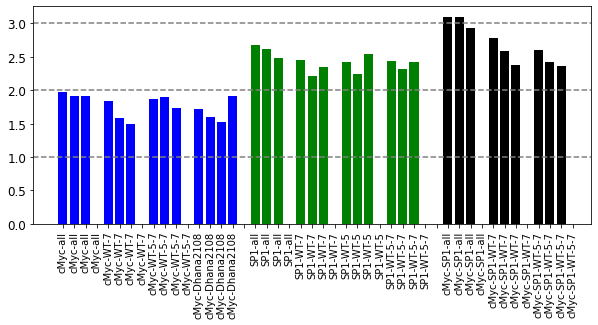

# cMyc_SP1_ZF(5X)
TF2: SP1 [3.282      2.922      3.148             nan 3.35195531 2.79469274
 2.87430168        nan 2.93907392 2.64662876 2.64662876        nan] [ True  True  True False  True  True  True False  True  True  True False]


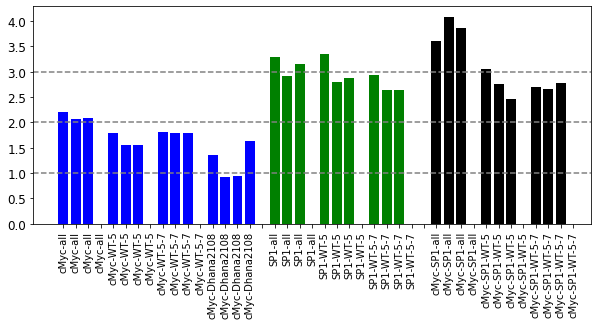

# cMyc_SP1_ZF(7X)
TF2: SP1 [3.107      2.752      2.824             nan 3.06687164 2.78554958
 2.99308225        nan 2.38342811 2.30056864 2.51015435        nan] [ True  True  True False  True  True  True False  True  True  True False]


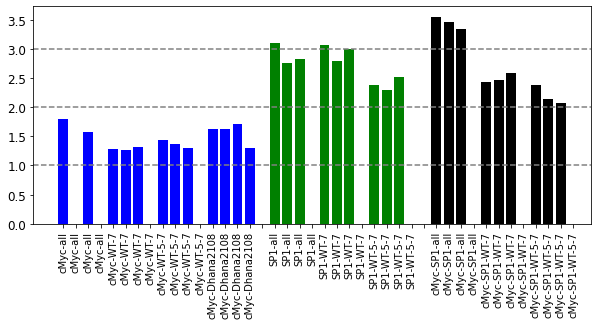

# cMyc_HSF1m_ZF(WT)
TF2: HSF1m [2.891      2.674      2.762             nan 2.67486549 2.56879324
 2.79938509        nan 3.00691776 2.78093774 2.79477325        nan
 2.95810056 2.70251397 2.68994413        nan 2.97135061 2.85675307
 2.63165075        nan 2.36693428 2.52155813 2.65953018 4.02022004] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False  True  True  True False]


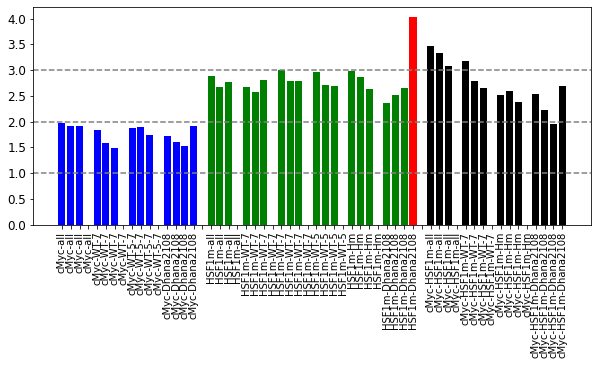

# cMyc_HSF1m_ZF(5X)
TF2: HSF1m [3.257      2.963      3.251             nan 3.44043044 3.15449654
 3.20522675        nan 3.27234637 3.36452514 3.31424581        nan
 3.37244202 3.44611187 3.16371078        nan 3.32084448 2.81653286
 2.75944098 4.64823075] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


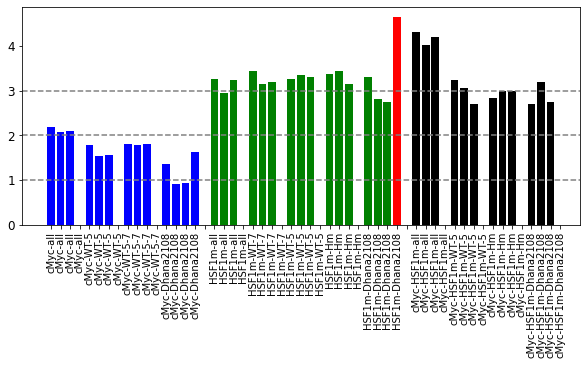

# cMyc_HSF1m_ZF(7X)
TF2: HSF1m [2.798      2.731      2.54              nan 2.97924673 2.70253651
 2.82705611        nan 2.73020753 2.58724058 2.59185242        nan
 2.43110505 2.43929059 2.39836289        nan 2.63812073 2.77371395
 2.58102884 3.35414808] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


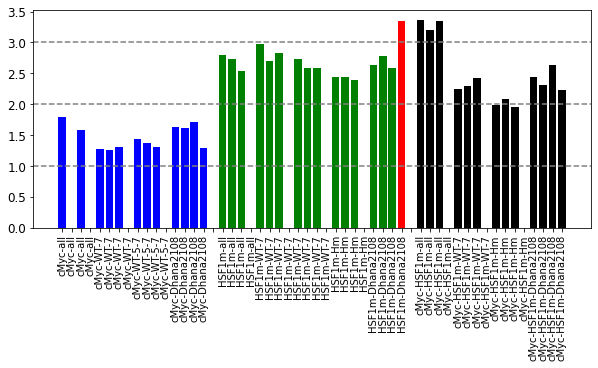

# cMyc_HSF1_ZF(WT)
TF2: HSF1 [3.401      3.154      3.401             nan 3.96617986 3.7217525
 3.74942352        nan 3.82960894 3.87150838 3.98044693        nan
 4.32331438 4.12347685 4.06011373        nan 3.20463847 3.30695771
 3.42564802        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


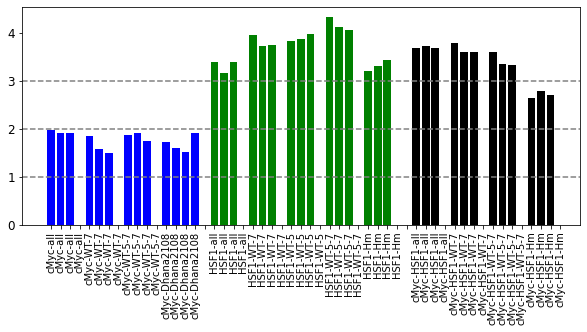

# cMyc_HSF1_ZF(5X)
TF2: HSF1 [4.246      3.999      3.844             nan 4.90223464 4.04748603
 3.95949721        nan 3.67018684 3.40698619 3.7530463         nan
 3.27830832 3.4420191  3.40518418        nan] [ True  True  True False False  True  True False  True  True  True False
  True  True  True False]


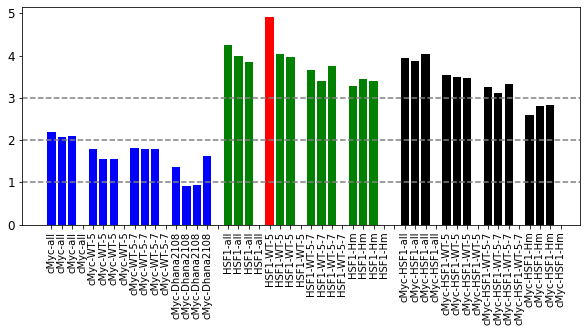

# cMyc_HSF1_ZF(7X)
TF2: HSF1 [2.958      2.819      2.839             nan 2.84089162 2.80860876
 2.87317448        nan 2.82209586 2.65637693 2.88058489        nan
 2.44338336 2.48021828 2.29604366        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True False False]


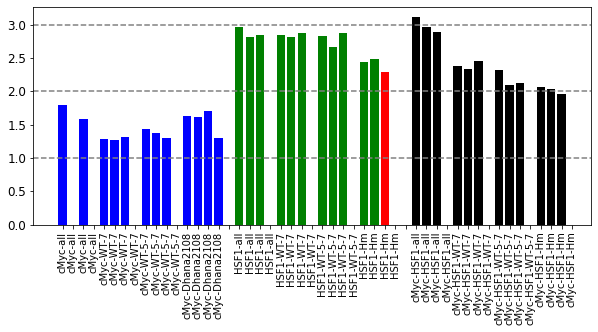

# cMyc_BRD4_ZF(WT)
TF2: BRD4 [2.345      2.133      2.133             nan 1.73866257 1.76172175
 1.95080707        nan 2.03631285 1.87290503 1.86033519        nan
 2.19333875 1.94963444 1.98862713        nan 1.04668451 1.91019923
 1.88878977 2.17424918] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False False  True  True  True]


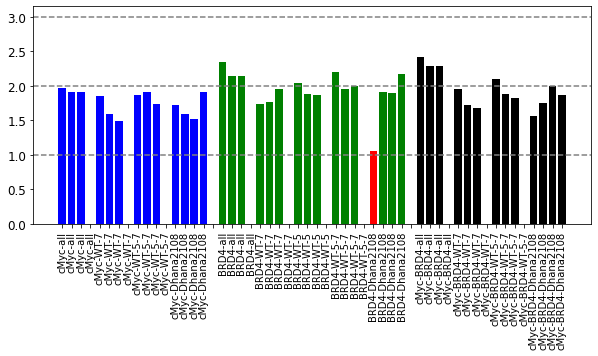

# cMyc_BRD4_ZF(5X)
TF2: BRD4 [2.308      2.345      2.365             nan 1.91061452 1.93575419
 1.97346369        nan 2.00324939 1.9642567  2.17871649        nan
 2.24323521 2.28605412 2.14808207 2.70710675] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


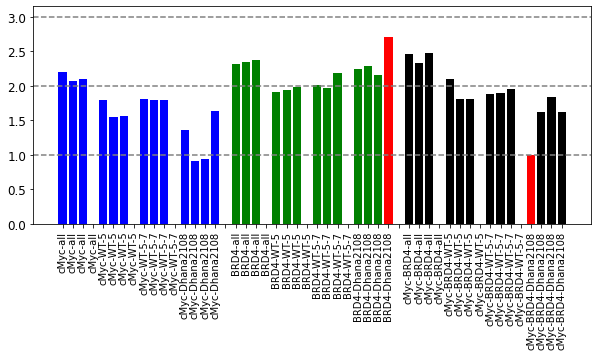

# cMyc_BRD4_ZF(7X)
TF2: BRD4 [1.927      1.685      1.814             nan 1.73866257 1.72943889
 1.51729439        nan 1.58895207 1.45247766 1.47684809        nan
 1.97204877 1.95063931 1.93874517 2.50014868] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


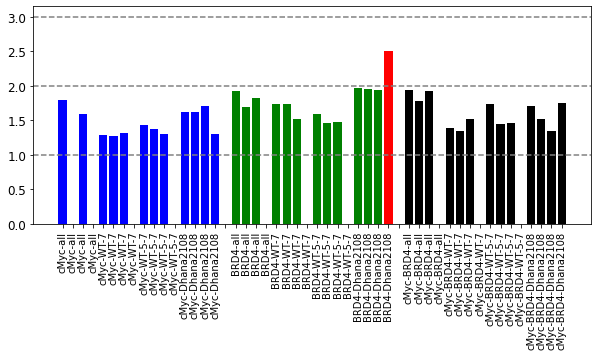

# SP1_HSF1m_ZF(WT)
TF2: HSF1m [2.891      2.674      2.762             nan 2.67486549 2.56879324
 2.79938509        nan 3.00691776 2.78093774 2.79477325        nan
 2.95810056 2.70251397 2.68994413        nan 2.97135061 2.85675307
 2.63165075        nan 2.36693428 2.52155813 2.65953018 4.02022004] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False  True  True  True False]


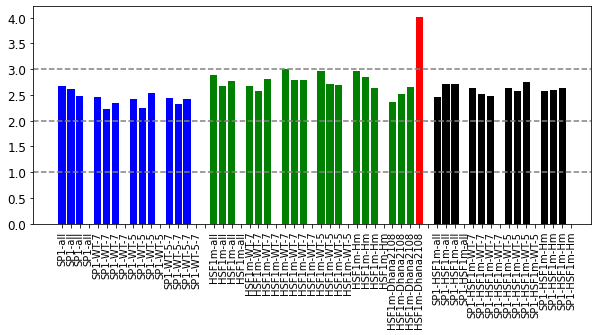

# SP1_HSF1m_ZF(5X)
TF2: HSF1m [3.257      2.963      3.251             nan 3.44043044 3.15449654
 3.20522675        nan 3.27234637 3.36452514 3.31424581        nan
 3.37244202 3.44611187 3.16371078        nan 3.32084448 2.81653286
 2.75944098 4.64823075] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


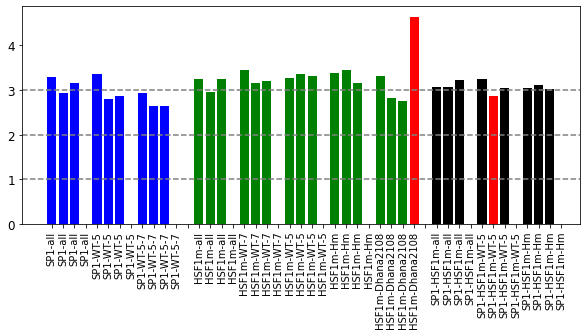

# SP1_HSF1m_ZF(7X)
TF2: HSF1m [2.798      2.731      2.54              nan 2.97924673 2.70253651
 2.82705611        nan 2.73020753 2.58724058 2.59185242        nan
 2.43110505 2.43929059 2.39836289        nan 2.63812073 2.77371395
 2.58102884 3.35414808] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


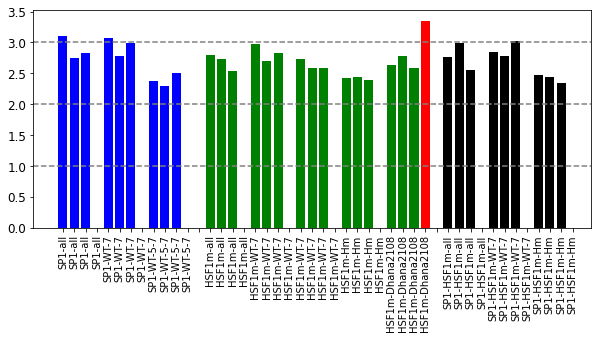

# SP1_HSF1_ZF(WT)
TF2: HSF1 [3.401      3.154      3.401             nan 3.96617986 3.7217525
 3.74942352        nan 3.82960894 3.87150838 3.98044693        nan
 4.32331438 4.12347685 4.06011373        nan 3.20463847 3.30695771
 3.42564802        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


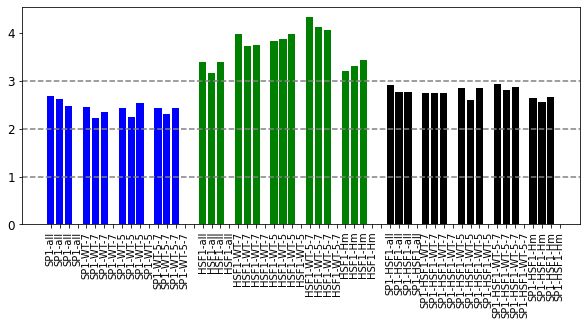

# SP1_HSF1_ZF(5X)
TF2: HSF1 [4.246      3.999      3.844             nan 4.90223464 4.04748603
 3.95949721        nan 3.67018684 3.40698619 3.7530463         nan
 3.27830832 3.4420191  3.40518418        nan] [ True  True  True False False  True  True False  True  True  True False
  True  True  True False]


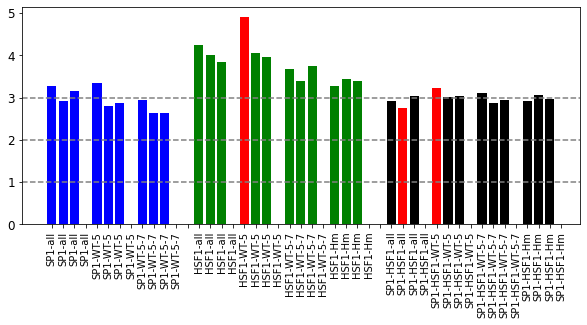

# SP1_HSF1_ZF(7X)
TF2: HSF1 [2.958      2.819      2.839             nan 2.84089162 2.80860876
 2.87317448        nan 2.82209586 2.65637693 2.88058489        nan
 2.44338336 2.48021828 2.29604366        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True False False]


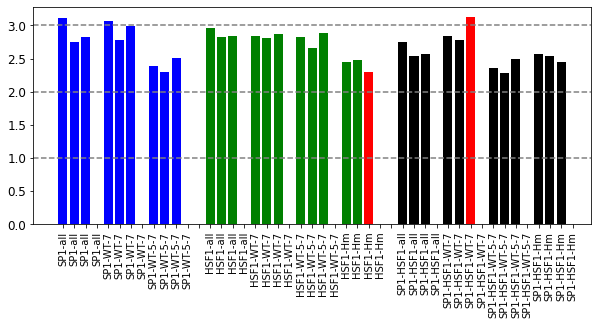

# SP1_BRD4_ZF(WT)
TF2: BRD4 [2.345      2.133      2.133             nan 1.73866257 1.76172175
 1.95080707        nan 2.03631285 1.87290503 1.86033519        nan
 2.19333875 1.94963444 1.98862713        nan 1.04668451 1.91019923
 1.88878977 2.17424918] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False False  True  True  True]


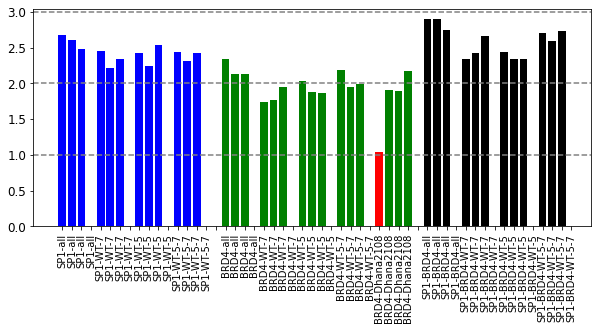

# SP1_BRD4_ZF(5X)
TF2: BRD4 [2.308      2.345      2.365             nan 1.91061452 1.93575419
 1.97346369        nan 2.00324939 1.9642567  2.17871649        nan
 2.24323521 2.28605412 2.14808207 2.70710675] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


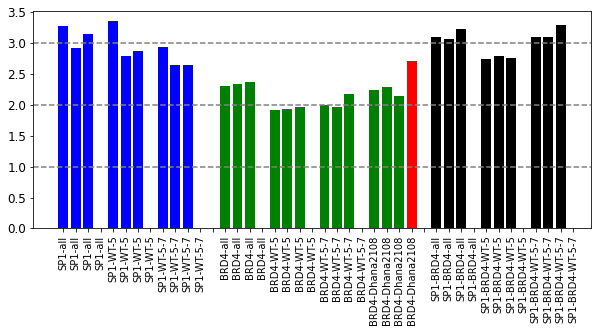

# SP1_BRD4_ZF(7X)
TF2: BRD4 [1.927      1.685      1.814             nan 1.73866257 1.72943889
 1.51729439        nan 1.58895207 1.45247766 1.47684809        nan
 1.97204877 1.95063931 1.93874517 2.50014868] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


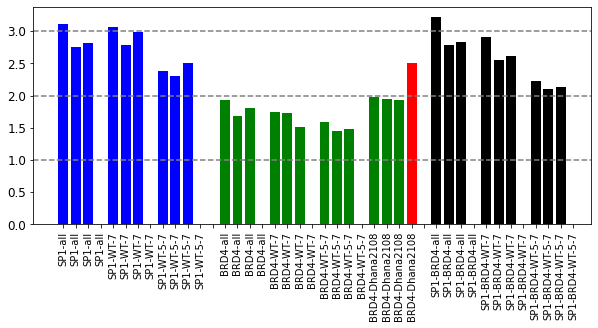

# HSF1m_HSF1_ZF(WT)
TF2: HSF1 [3.401      3.154      3.401             nan 3.96617986 3.7217525
 3.74942352        nan 3.82960894 3.87150838 3.98044693        nan
 4.32331438 4.12347685 4.06011373        nan 3.20463847 3.30695771
 3.42564802        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]


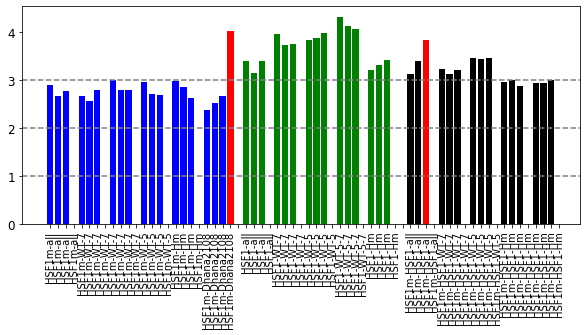

# HSF1m_HSF1_ZF(5X)
TF2: HSF1 [4.246      3.999      3.844             nan 4.90223464 4.04748603
 3.95949721        nan 3.67018684 3.40698619 3.7530463         nan
 3.27830832 3.4420191  3.40518418        nan] [ True  True  True False False  True  True False  True  True  True False
  True  True  True False]


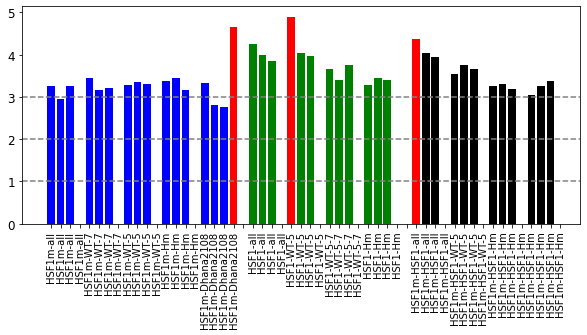

# HSF1m_HSF1_ZF(7X)
TF2: HSF1 [2.958      2.819      2.839             nan 2.84089162 2.80860876
 2.87317448        nan 2.82209586 2.65637693 2.88058489        nan
 2.44338336 2.48021828 2.29604366        nan] [ True  True  True False  True  True  True False  True  True  True False
  True  True False False]


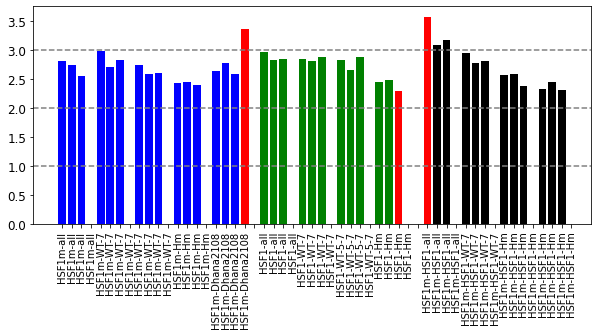

# HSF1m_BRD4_ZF(WT)
TF2: BRD4 [2.345      2.133      2.133             nan 1.73866257 1.76172175
 1.95080707        nan 2.03631285 1.87290503 1.86033519        nan
 2.19333875 1.94963444 1.98862713        nan 1.04668451 1.91019923
 1.88878977 2.17424918] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False False  True  True  True]


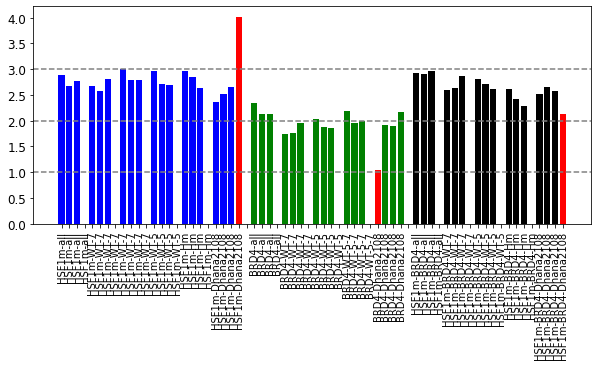

# HSF1m_BRD4_ZF(5X)
TF2: BRD4 [2.308      2.345      2.365             nan 1.91061452 1.93575419
 1.97346369        nan 2.00324939 1.9642567  2.17871649        nan
 2.24323521 2.28605412 2.14808207 2.70710675] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


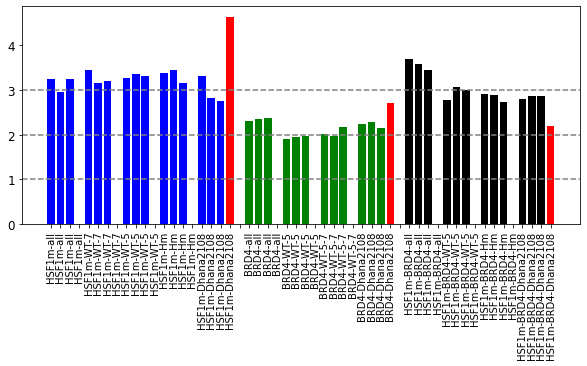

# HSF1m_BRD4_ZF(7X)
TF2: BRD4 [1.927      1.685      1.814             nan 1.73866257 1.72943889
 1.51729439        nan 1.58895207 1.45247766 1.47684809        nan
 1.97204877 1.95063931 1.93874517 2.50014868] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


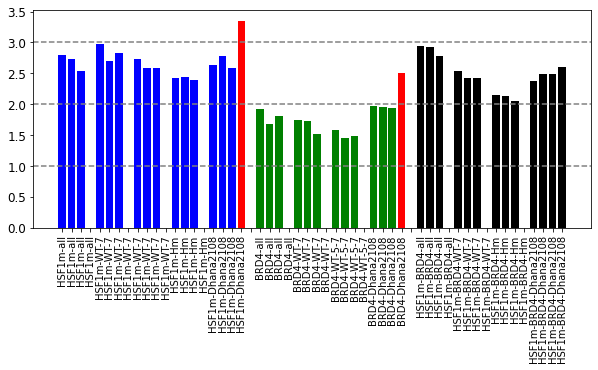

# HSF1_BRD4_ZF(WT)
TF2: BRD4 [2.345      2.133      2.133             nan 1.73866257 1.76172175
 1.95080707        nan 2.03631285 1.87290503 1.86033519        nan
 2.19333875 1.94963444 1.98862713        nan 1.04668451 1.91019923
 1.88878977 2.17424918] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False False  True  True  True]


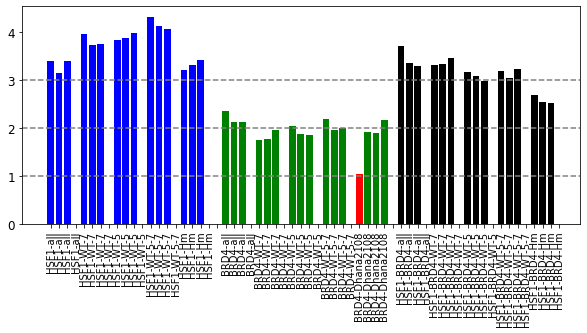

# HSF1_BRD4_ZF(5X)
TF2: BRD4 [2.308      2.345      2.365             nan 1.91061452 1.93575419
 1.97346369        nan 2.00324939 1.9642567  2.17871649        nan
 2.24323521 2.28605412 2.14808207 2.70710675] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


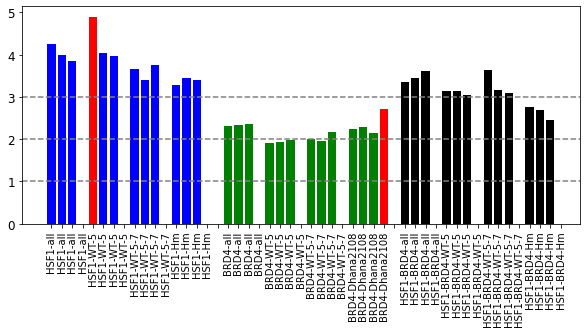

# HSF1_BRD4_ZF(7X)
TF2: BRD4 [1.927      1.685      1.814             nan 1.73866257 1.72943889
 1.51729439        nan 1.58895207 1.45247766 1.47684809        nan
 1.97204877 1.95063931 1.93874517 2.50014868] [ True  True  True False  True  True  True False  True  True  True False
  True  True  True False]


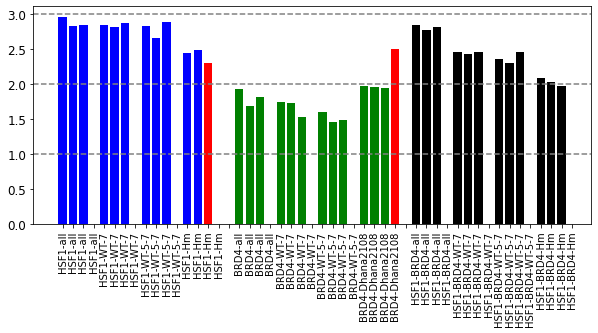

In [18]:
df=alldfsj
colorsl=["b","g","k"]
TFnames=('cMyc', 'SP1', 'HSF1m', 'HSF1', 'BRD4', 'empty')
for n1 in range(len(TFnames)-2):
    for n2 in range(n1+1,len(TFnames)-1):
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        subdf_=df[((df['activator1']==TF1)&(df['activator2']==TF2))|((df['activator1']==TF2)&(df['activator2']==TF1))] #[cGFP]
        for affinity in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
            subdf=subdf_[(subdf_["affinity1"]==affinity)&(subdf_["affinity2"]==affinity)]
         
            ref1=df[(df['activator1']==TF1)&(df['activator2']==TF1)&(df["affinity1"]==affinity)&(df["affinity2"]==affinity)] 
            ref2=df[(df['activator1']==TF2)&(df['activator2']==TF2)&(df["affinity1"]==affinity)&(df["affinity2"]==affinity)]

            values=[]
            colors=[]
            print("# %s_%s_%s"%(TF1,TF2,affinity))

            fig,ax=plt.subplots(1,1,figsize=(10,4))
            values1=[]
            ticklabels=[]
            colors1=[]

            for i in range(len(ref1)):
                row=ref1.iloc[i]
                name=row["name"]
                foldchanges=row[["GFPfa1","GFPfa2","GFPfa3","GFPfa4"]].values
                values1.extend(list(foldchanges))
                ticklabels.extend([TF1+"-"+name]*4)
                colors1.extend([colorsl[0]]*4)
            values1=np.asarray(values1)
            #now detect outliers
            mask=mask_outliers(values1)

            #values1[~mask]=np.NaN
            colors1=np.asarray(colors1)
            colors1[~mask]="red"
            values.extend(list(values1))
            colors.extend(list(colors1))

            values.append(0)
            ticklabels.append("")
            colors.append("white")

            values2=[]
            colors2=[]

            for i in range(len(ref2)):
                row=ref2.iloc[i]
                name=row["name"]
                foldchanges=row[["GFPfa1","GFPfa2","GFPfa3","GFPfa4"]].values
                values2.extend(list(foldchanges))
                ticklabels.extend([TF2+"-"+name]*4)
                colors2.extend([colorsl[1]]*4)
            values2=np.asarray(values2)
            mask=mask_outliers(values2)
            print("TF2:", TF2, values2,mask)

            #values2[~mask]=np.NaN
            colors2=np.asarray(colors2)
            colors2[~mask]="red"
            colors.extend(list(colors2))
            values.extend(list(values2))

            values.append(0)
            ticklabels.append("")
            colors.append("white")

            values3=[]  
            colors3=[]
            for i in range(len(subdf)):
                row=subdf.iloc[i]
                name=row["name"]
                foldchanges=row[["GFPfa1","GFPfa2","GFPfa3","GFPfa4"]].values
                values3.extend(list(foldchanges))
                ticklabels.extend([TF1+"-"+TF2+"-"+name]*4)
                colors3.extend([colorsl[2]]*4)
            values3=np.asarray(values3)
            mask=mask_outliers(values3)
            #values3[~mask]=np.NaN
            colors3=np.asarray(colors3)
            colors3[~mask]="red"
            colors.extend(list(colors3))
            values.extend(list(values3))

            ax.bar(range(len(values)),values,color=colors)
            ax.set_xticks(range(len(values)))
            ax.set_xticklabels(ticklabels,rotation=90,fontsize=10)
            ax.axhline(y=1,linestyle="--",color="gray")
            ax.axhline(y=2,linestyle="--",color="gray")
            ax.axhline(y=3,linestyle="--",color="gray")
            plt.show()

In [19]:
#Now calculate a new df where the above-selected outliers are set to nan, so that we can then do all the analysis without those values
df_nooutliers=alldfsj.copy()
df=alldfsj
colnames_fc=np.array(["GFPfa1","GFPfa2","GFPfa3","GFPfa4"])
colnames_fc
for n1 in range(len(TFnames)-2):
    for n2 in range(n1+1,len(TFnames)-1):
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        subdf_=df[((df['activator1']==TF1)&(df['activator2']==TF2))|((df['activator1']==TF2)&(df['activator2']==TF1))] #[cGFP]
        for affinity in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
            subdf=subdf_[(subdf_["affinity1"]==affinity)&(subdf_["affinity2"]==affinity)]
         
            ref1=df[(df['activator1']==TF1)&(df['activator2']==TF1)&(df["affinity1"]==affinity)&(df["affinity2"]==affinity)] 
            ref2=df[(df['activator1']==TF2)&(df['activator2']==TF2)&(df["affinity1"]==affinity)&(df["affinity2"]==affinity)]

        
            for s,selection in enumerate([subdf,ref1,ref2]):
                values=[]
                original_indexes=[]
                original_columns=[]
                original_names=[]
                for i in range(len(selection)):
                    row=selection.iloc[i]
                    values.extend(list(row[colnames_fc].values))
                    original_index=selection.index[i]
                    original_indexes.extend([original_index]*4)
                    original_columns.extend(list(colnames_fc))
                    original_names.extend([row["name"]]*4)

                mask=mask_outliers(values)
                for i in range(len(mask)):
                    if not mask[i]:


                        if original_names[i]!="Dhana2108" and original_columns[i]!="GFPfa4": #these ones only have 3 repeats
                            if s==0:
                                print("*Masking combi", TF1, TF2,end=",")
                            elif s==1:
                                print("*Masking", TF1,end=",")
                            else:
                                print("*Masking", TF2,end=",")
                            print(original_names[i],original_columns[i])
                            print(values)
                            print(original_columns)
                            print(original_names)
                            print(mask)
                            print(df.loc[original_indexes[i]])
                        elif original_names[i]=="Dhana2108":
                            if s==0:
                                print("Masking combi", TF1, TF2,end=",")
                            elif s==1:
                                print("Masking", TF1,end=",")
                            else:
                                print("Masking", TF2,end=",")
                            print(original_names[i],original_columns[i])

                        df_nooutliers.loc[original_indexes[i],original_columns[i]]=np.NaN
                
        

*Masking cMyc,all GFPfa2
[1.793, nan, 1.582, nan, 1.277478863, 1.263643351, 1.309761722, nan, 1.432981316, 1.374492283, 1.301380991, nan, 1.6247398156407968, 1.6199821587867975, 1.703241153731787, 1.296461492714838]
['GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4']
['all', 'all', 'all', 'all', 'WT-7', 'WT-7', 'WT-7', 'WT-7', 'WT-5-7', 'WT-5-7', 'WT-5-7', 'WT-5-7', 'Dhana2108', 'Dhana2108', 'Dhana2108', 'Dhana2108']
[ True False  True False  True  True  True False  True  True  True False
  True  True  True  True]
index              2
activator1      cMyc
affinity1     ZF(7X)
activator2      cMyc
affinity2     ZF(7X)
GFPfa1         1.793
GFPfa2           NaN
GFPfa3         1.582
name             all
GFPfa4           NaN
Name: 2, dtype: object
Masking HSF1m,Dhana2108 GFPfa4
Masking combi cMyc HSF1m,Dhana2108 GFPfa4
Masking HSF1m,Dhana2108 GFPfa4
*Masking cMyc,all GFPfa2
[1.793, n

*Masking combi HSF1m HSF1,all GFPfa3
[3.133, 3.396, 3.844, nan, 3.237509608, 3.131437356, 3.214450423, nan, 3.452513966, 3.439944134, 3.45670391, nan, 2.963165075, 2.991814461, 2.877216917, nan, 2.93042292, 2.942701228, 2.991814461, nan]
['GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4', 'GFPfa1', 'GFPfa2', 'GFPfa3', 'GFPfa4']
['all', 'all', 'all', 'all', 'WT-7', 'WT-7', 'WT-7', 'WT-7', 'WT-5', 'WT-5', 'WT-5', 'WT-5', 'Hm', 'Hm', 'Hm', 'Hm', 'Hm', 'Hm', 'Hm', 'Hm']
[ True  True False False  True  True  True False  True  True  True False
  True  True  True False  True  True  True False]
index             54
activator1     HSF1m
affinity1     ZF(WT)
activator2      HSF1
affinity2     ZF(WT)
GFPfa1         3.133
GFPfa2         3.396
GFPfa3         3.844
name             all
GFPfa4           NaN
Name: 54, dtype: object
Masking HSF1m,Dhana2108 GFPfa4
*Masking combi HSF1m HSF1,all GF

In [20]:
#Compute a dataframe where each row is a pair, and each column has all the info for the synergy calculation

TFnames=('cMyc', 'SP1', 'HSF1m', 'HSF1', 'BRD4', 'empty')
affinities=['ZF(WT)','ZF(5X)','ZF(7X)']
cGFP=['GFPfa1','GFPfa2','GFPfa3','GFPfa4']


allrows=[]

for n1 in range(len(TFnames)):
    for n2 in range(n1+1,len(TFnames)):
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        for af1 in affinities:
            af2=af1 #for af2 in affinities
            if True:
                for df_name in df_nooutliers.groupby("name"):
                    name,df=df_name
                    combi1=df[(df['activator1']==TF1)&(df['activator2']==TF2)&(df['affinity1']==af1)&(df['affinity2']==af2)] #[cGFP]
                    combi2=df[(df['activator1']==TF2)&(df['activator2']==TF1)&(df['affinity1']==af2)&(df['affinity2']==af1)] #[cGFP]

                    found=True
                    if len(combi1)>0 and len(combi2)>0:
                        subdf=pd.concat([combi1,combi2])
                    elif len(combi1)>0:
                        subdf=combi1
                    elif len(combi2)>0:
                        subdf=combi2
                    else:
                        found=False
                        #if name=="Hm":
                        print("not found",name, TF1, af1, TF2, af2) #sanity check with what was measured in each file

                    if found:
                        #Notice that for "Hm", the measurements for the 1 TF at 2X concentration are missing for all TFs except HSF1 and HSF1m and so these are not considered
                        #reference values, with only TF1 or TF2 and a given affinity
                        ref1=df[(df['activator1']==TF1)&(df['activator2']==TF1)&(df['affinity1']==af1)&(df['affinity2']==af1)] 
                        ref2=df[(df['activator1']==TF2)&(df['activator2']==TF2)&(df['affinity1']==af2)&(df['affinity2']==af2)] 
                        if len(ref1)>0 and len(ref2)>0: #need to make sure both references exist
                            combival=np.nanmean(subdf[cGFP].values)
                            r1val=np.nanmean(ref1[cGFP].values)
                            r2val=np.nanmean(ref2[cGFP].values)

                            if r1val>r2val:
                                SAB=np.log2(combival/r1val)
                                SBA=np.log2(combival/r2val)
                                TFA=TF1
                            else:
                                SAB=np.log2(combival/r2val)
                                SBA=np.log2(combival/r1val)
                                TFA=TF2
                            if np.isnan(SAB) or np.isnan(SBA):
                                print("NAN!!",SAB,SBA,combival,r1val,r2val,np.log2(combival/r1val),np.log2(combival/r2val))

                            allrows.append([TF1,TF2,af1,af2,SAB,SBA,TFA,name,combival,r1val,r2val])
            

not found Dhana2108 cMyc ZF(WT) SP1 ZF(WT)
not found Hm cMyc ZF(WT) SP1 ZF(WT)
not found WT-5 cMyc ZF(WT) SP1 ZF(WT)
not found Dhana2108 cMyc ZF(5X) SP1 ZF(5X)
not found Hm cMyc ZF(5X) SP1 ZF(5X)
not found WT-7 cMyc ZF(5X) SP1 ZF(5X)
not found Dhana2108 cMyc ZF(7X) SP1 ZF(7X)
not found Hm cMyc ZF(7X) SP1 ZF(7X)
not found WT-5 cMyc ZF(7X) SP1 ZF(7X)
not found WT-5 cMyc ZF(WT) HSF1m ZF(WT)
not found WT-5-7 cMyc ZF(WT) HSF1m ZF(WT)
not found WT-5-7 cMyc ZF(5X) HSF1m ZF(5X)
not found WT-7 cMyc ZF(5X) HSF1m ZF(5X)
not found WT-5 cMyc ZF(7X) HSF1m ZF(7X)
not found WT-5-7 cMyc ZF(7X) HSF1m ZF(7X)
not found Dhana2108 cMyc ZF(WT) HSF1 ZF(WT)
not found WT-5 cMyc ZF(WT) HSF1 ZF(WT)
not found Dhana2108 cMyc ZF(5X) HSF1 ZF(5X)
not found WT-7 cMyc ZF(5X) HSF1 ZF(5X)
not found Dhana2108 cMyc ZF(7X) HSF1 ZF(7X)
not found WT-5 cMyc ZF(7X) HSF1 ZF(7X)
not found Hm cMyc ZF(WT) BRD4 ZF(WT)
not found WT-5 cMyc ZF(WT) BRD4 ZF(WT)
not found Hm cMyc ZF(5X) BRD4 ZF(5X)
not found WT-7 cMyc ZF(5X) BRD4 ZF(5X)
no

In [21]:
dfsyn=pd.DataFrame(data=np.vstack(allrows),columns=['TF1','TF2','af1','af2','SAB','SBA','TFA','name',"fcGFPAB","fcGFP1","fcGFP2"])

In [22]:
swap=False #first I thought we might change those conditions where the strongest TF is not the same, but it is best to consider synergy a property of the pair and just go with that
print("conditions where TFA is not always the same:")
for df_ in dfsyn.groupby(["TF1","TF2","af1","af2"]):
    TFAs=df_[1]["TFA"].values
    TFAsu,indices,count=np.unique(TFAs,return_index=True,return_counts=True)
    if len(TFAsu)>1:
        #print(df_[1])
        display(df_[1])
        if swap:
            argmax=np.argmax(count)
            mostcommon=TFAsu[argmax]
            print(count, argmax,mostcommon)
            #swap SAB and SBA:
            indices=df_[1].index
            for idx in indices:
                originalrow=dfsyn.iloc[idx]
                if originalrow["TFA"]!=mostcommon:
                    print("swapping")
                    SAB=originalrow["SAB"]
                    SBA=originalrow["SBA"]
                    dfsyn.loc[idx,"SAB"]=SBA
                    dfsyn.loc[idx,"SBA"]=SAB
                    dfsyn.loc[idx,"TFA"]=mostcommon+"(sw)"
                #print(dfsyn.iloc[idx])
            #print(indices)
    #print(df_[1])

conditions where TFA is not always the same:


,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
62,SP1,HSF1,ZF(7X),ZF(7X),-0.22533970520584087,-0.008823850190159957,HSF1,WT-5-7,2.383428107333333,2.3980503653333334,2.786352558666666
63,SP1,HSF1,ZF(7X),ZF(7X),-0.0665770193618007,-0.012939055826449462,SP1,WT-7,2.815526518,2.948501153,2.8408916219999996
64,SP1,HSF1,ZF(7X),ZF(7X),-0.14513341103548427,-0.1339580770780365,SP1,all,2.6173333333333333,2.8943333333333334,2.872


,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
45,cMyc,empty,ZF(7X),ZF(7X),-0.15538740338112472,-0.05939292861800472,empty,WT-5-7,1.314378554,1.3696181966666667,1.463850528
46,cMyc,empty,ZF(7X),ZF(7X),0.06180528484948203,0.1554545187467739,empty,WT-7,1.4296694853333334,1.2836279786666667,1.369715603333333
47,cMyc,empty,ZF(7X),ZF(7X),-0.028928267654280963,0.22685747044186932,cMyc,all,1.654,1.6875,1.4133333333333333


Note that cMyc-empty is not really relevant, but SP1-HSF1 is not consistent. Keep like that because really we are interested in whether expression is higher/lower than strongest

In [23]:
#in case something is swapped in the code above, here doublecheck it is ok now
for df_ in dfsyn.groupby(["TF1","TF2","af1","af2"]):
    TFAs=df_[1]["TFA"].values
    TFAsu,indices,count=np.unique(TFAs,return_index=True,return_counts=True)
    if len(TFAsu)>1:
        #print(df_[1])
        display(df_[1])

,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
62,SP1,HSF1,ZF(7X),ZF(7X),-0.22533970520584087,-0.008823850190159957,HSF1,WT-5-7,2.383428107333333,2.3980503653333334,2.786352558666666
63,SP1,HSF1,ZF(7X),ZF(7X),-0.0665770193618007,-0.012939055826449462,SP1,WT-7,2.815526518,2.948501153,2.8408916219999996
64,SP1,HSF1,ZF(7X),ZF(7X),-0.14513341103548427,-0.1339580770780365,SP1,all,2.6173333333333333,2.8943333333333334,2.872


,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
45,cMyc,empty,ZF(7X),ZF(7X),-0.15538740338112472,-0.05939292861800472,empty,WT-5-7,1.314378554,1.3696181966666667,1.463850528
46,cMyc,empty,ZF(7X),ZF(7X),0.06180528484948203,0.1554545187467739,empty,WT-7,1.4296694853333334,1.2836279786666667,1.369715603333333
47,cMyc,empty,ZF(7X),ZF(7X),-0.028928267654280963,0.22685747044186932,cMyc,all,1.654,1.6875,1.4133333333333333


In [33]:
#doublecheck the value of synergy for one case e.g. HSF1m-HSF1 from dataset all
df_nooutliers[(df_nooutliers["activator1"]=="HSF1m")&(df_nooutliers["activator2"]=="HSF1")&(df_nooutliers["name"]=="all")]

,index,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
54,54,HSF1m,ZF(WT),HSF1,ZF(WT),3.133,3.396,NaN,all,NaN
55,55,HSF1m,ZF(5X),HSF1,ZF(5X),NaN,4.035,3.947,all,NaN
56,56,HSF1m,ZF(7X),HSF1,ZF(7X),NaN,3.081,3.164,all,NaN


In [34]:
df_nooutliers[(df_nooutliers["activator1"]=="HSF1m")&(df_nooutliers["activator2"]=="HSF1m")&(df_nooutliers["name"]=="all")]

,index,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
51,51,HSF1m,ZF(WT),HSF1m,ZF(WT),2.891,2.674,2.762,all,NaN
52,52,HSF1m,ZF(5X),HSF1m,ZF(5X),3.257,2.963,3.251,all,NaN
53,53,HSF1m,ZF(7X),HSF1m,ZF(7X),2.798,2.731,2.540,all,NaN


In [35]:
df_nooutliers[(df_nooutliers["activator1"]=="HSF1")&(df_nooutliers["activator2"]=="HSF1")&(df_nooutliers["name"]=="all")]

,index,activator1,affinity1,activator2,affinity2,GFPfa1,GFPfa2,GFPfa3,name,GFPfa4
62,62,HSF1,ZF(WT),HSF1,ZF(WT),3.401,3.154,3.401,all,NaN
63,63,HSF1,ZF(5X),HSF1,ZF(5X),4.246,3.999,3.844,all,NaN
64,64,HSF1,ZF(7X),HSF1,ZF(7X),2.958,2.819,2.839,all,NaN


In [38]:
dfsyn[(dfsyn["TF1"]=="HSF1m")&(dfsyn["TF2"]=="HSF1")&(dfsyn["name"]=="all")]

,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
88,HSF1m,HSF1,ZF(WT),ZF(WT),-0.023741688135253868,0.23402771822275303,HSF1,all,3.2645,2.7756666666666665,3.3186666666666667
91,HSF1m,HSF1,ZF(5X),ZF(5X),-0.013910225354100612,0.33819601819828654,HSF1,all,3.991,3.157,4.0296666666666665
94,HSF1m,HSF1,ZF(7X),ZF(7X),0.12064582267226831,0.215274182748308,HSF1,all,3.1225,2.689666666666666,2.872


In [24]:
#this can be saved if desired and could be read from here
#dfsyn.to_csv("./files/2022_08_19_dfsyn_noout.df")

In [25]:
import matplotlib
def compute_percentiles(values):
    vals=values.flatten()
    vals=vals[~np.isnan(vals)] #make sure there are not nans
    np.random.seed(1)
    niters=1000
    out=np.zeros(niters)
    N=len(vals)
    for i in range(niters):
        choice=np.random.choice(vals,size=N,replace=True)
        out[i]=np.mean(choice)
    #plt.hist(out)
    #plt.show()
    #print(min(out),(max(out)))
    return np.percentile(out,[2.5,97.5])

colorsnew={"SP1":"#bc5b2d","HSF1m":"#e69c0c","cMyc":"#030c7b","BRD4":"#0569f5","HSF1":"#82dabd","empty":"darkgrey"}
colorsnew2={"SP1":"#7a3818","HSF1m":"#b37807","cMyc":"k","BRD4":"#020d9c","HSF1":"#69b59c","empty":"grey"}
colorsnew3={"SP1":"#d5a791","HSF1m":"#eec87e","cMyc":"#7079de","BRD4":"#95baed","HSF1":"#d1f3e8","empty":"grey"}

markerdict={"WT-WT":"o",
            "WT-5X":"^",
            "5X-WT":"v",
            "WT-7X":">",
            "7X-WT":"<",
            "5X-7X":"*",
            "7X-5X":"X",
            "5X-5X":"D",
            "7X-7X":"s"}
markerdictkorder=["WT-WT","5X-5X","7X-7X","WT-5X","5X-WT","WT-7X","7X-WT","5X-7X","7X-5X"]
colorsdict={'c-S':'yellowgreen', 'c-m':'green', 'c-H':'purple', 'c-B':'blue', 
             'S-m':'orange', 'S-H':'magenta',
            'S-B':'darkolivegreen',  'm-H':'plum', 'm-B':'palegreen', 
            'H-B':'pink', 
            'c-c':'b','c-e':'b', 'S-e':'r','S-S':'r', 'm-m':'orange','m-e':'orange', 'H-H':'purple', 'H-e':'purple', 'B-B':'lightblue','B-e':'lightblue', 'e-e':'grey'}
markers={"SP1":"s","HSF1m":"s","cMyc":"H","BRD4":"H","HSF1":"^"}
#sizes={"SP1":100,"HSF1m":100,"cMyc":100,"BRD4":15,"HSF1":30}
colorsorder=['c-S','m-B','c-m','S-B','m-H','H-B','S-H','c-H','c-B','S-m']
afpat=re.compile(r'\((.+)\)')
green="#c6cdad"
blue="#d3dbe4"
red="#e3cbc8"

12
empty - [1.371      1.324      1.345      1.16218294 1.16218294 1.33743274
 1.48743017 1.31145251 1.26536313 1.44760357 1.35012185 1.33549959] 1.3249391204166667 1.162182936 1.487430167
16
empty empty [1.17       1.278      1.247      1.15295926 1.16679477 1.34665642
 1.42458101 1.28212291 1.21927374 1.46709992 1.35987002 1.32087734
 1.41778174 1.24174844 1.34879572 1.28932501] 1.295805393183021 1.152959262 1.467099919
9
cMyc - [1.505      1.479      1.505      1.38816295 1.40199846 1.47117602
 1.57432981 1.39398863 1.4378554 ] 1.4618345862222222 1.388162952 1.574329813
13
cMyc cMyc [1.968      1.907      1.912      1.84473482 1.58647194 1.48962337
 1.86677498 1.90089358 1.74004874 1.71989295 1.59381505 1.52245019
 1.90544157] 1.765934399778243 1.489623367 1.968
12
BRD4 - [1.845      1.752      1.747      1.70176787 1.47117602 1.4942352
 1.68435754 1.66759777 1.79748603 1.77416734 1.65718928 1.84240455] 1.702865133666667 1.471176019 1.845
15
BRD4 BRD4 [2.345      2.133      2.133   

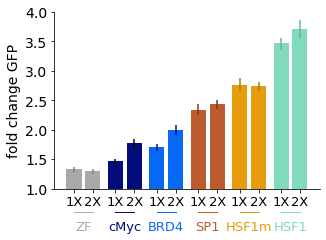

In [26]:
#barplot of response to each TF alone
#Fig3 main v1 - initial submission
mpl.rcParams["font.size"]=14
fontsize=13
df=df_nooutliers

fig=plt.figure(figsize=(4.75,3.25))
ax=fig.add_subplot(111)
af1="ZF(WT)"
TFind=["empty", "cMyc", "BRD4", "SP1", "HSF1m", "HSF1"]
colorsb=["gray","dodgerblue","dodgerblue","orange","orange","purple"]
xlocs=[]
for t,TF in enumerate(TFind):
    TF1=TF
    for t2,TF2 in enumerate(['-',TF1]):
        found=True
        if TF2==TF1:
            af2="ZF(WT)"
        else:
            af2='-'
    
        combi1=df[(df['activator1']==TF1)&(df['activator2']==TF2)&(df['affinity1']==af1)&(df['affinity2']==af2)] #[cGFP]
        combi2=df[(df['activator1']==TF2)&(df['activator2']==TF1)&(df['affinity1']==af2)&(df['affinity2']==af1)] #[cGFP]
        
        if len(combi1)>0 and len(combi2)>0:
            subdf=pd.concat([combi1,combi2])
        elif len(combi1)>0:
            subdf=combi1
        elif len(combi2)>0:
            subdf=combi2
        else:
            found=False
        if not found:
            print("not found")
        else:
            subdf=subdf.drop_duplicates()
            v1=subdf[cGFP].values
            v1=v1[~np.isnan(v1)]
            
            mv1=np.nanmean(v1)
            print(len(v1))
            print(TF1,TF2,v1,mv1,np.min(v1),np.max(v1))
            
            #yerr=[mv1-np.min(v1),np.max(v1)-mv1]
            percentiles=compute_percentiles(v1)
            #print("percentiles", percentiles, mv1)
            #yerr=[mv1-]
            lower=mv1-percentiles[0]
            upper=percentiles[1]-mv1
            #print("mean",mv1)
            #print("lower",lower)
            #print("upper",upper)
            ax.bar(2.2*t+t2,mv1,yerr=np.array([[lower],[upper]]),color=colorsnew[TF],ecolor=colorsnew2[TF],width=0.8)
            xlocs.append(2.2*t+t2)
            #error is the range of the data
            

ax.set_xticks(xlocs)
ax.set_xticklabels(["1X","2X"]*6,fontsize=fontsize)
for i in range(len(TFind)):
    TF=TFind[i]
    if TF=="empty":
        TFtext="ZF"
    else:
        TFtext=TF
    ax.text(2.2*i+0.5,0.3,TFtext,fontsize=fontsize,horizontalalignment='center',color=colorsnew[TF])
# new clear axis overlay with 0-1 limits
for i in range(len(TFind)):
    x,y = np.array([[2.2*i, 2.2*i+1], [0.6,0.6]])
    line = matplotlib.lines.Line2D(x, y, lw=1., color=colorsnew[TFind[i]])
    
    ax.add_line(line)
    line.set_clip_on(False)

    #ax.plot([0.95*2*i,1.05*2*i],[-0.6,-0.6])
    #ax.draw(2*i,-0.6,)
ax.set_ylim(1,4)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel("fold change GFP")
#plt.savefig("../figs/singleTF.pdf")
plt.show()
          

12
empty - [1.371      1.324      1.345      1.16218294 1.16218294 1.33743274
 1.48743017 1.31145251 1.26536313 1.44760357 1.35012185 1.33549959] 1.3249391204166667 1.162182936 1.487430167
16
empty empty [1.17       1.278      1.247      1.15295926 1.16679477 1.34665642
 1.42458101 1.28212291 1.21927374 1.46709992 1.35987002 1.32087734
 1.41778174 1.24174844 1.34879572 1.28932501] 1.295805393183021 1.152959262 1.467099919
9
cMyc - [1.505      1.479      1.505      1.38816295 1.40199846 1.47117602
 1.57432981 1.39398863 1.4378554 ] 1.4618345862222222 1.388162952 1.574329813
13
cMyc cMyc [1.968      1.907      1.912      1.84473482 1.58647194 1.48962337
 1.86677498 1.90089358 1.74004874 1.71989295 1.59381505 1.52245019
 1.90544157] 1.765934399778243 1.489623367 1.968
12
BRD4 - [1.845      1.752      1.747      1.70176787 1.47117602 1.4942352
 1.68435754 1.66759777 1.79748603 1.77416734 1.65718928 1.84240455] 1.702865133666667 1.471176019 1.845
15
BRD4 BRD4 [2.345      2.133      2.133   

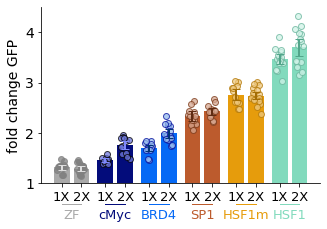

In [43]:
#barplot of response to each TF alone with each individual datapoints (revision)
#Fig3main
colors_errors={"SP1":"#5f2c13","HSF1m":"#a46e06","cMyc":"#7f89fc","BRD4":"#023376","HSF1":"#52a58a","empty":"#dedede"}

mpl.rcParams["font.size"]=14
fontsize=13
df=df_nooutliers

fig=plt.figure(figsize=(5,3.25))
ax=fig.add_subplot(111)
af1="ZF(WT)"
TFind=["empty", "cMyc", "BRD4", "SP1", "HSF1m", "HSF1"]
colorsb=["gray","dodgerblue","dodgerblue","orange","orange","purple"]
xlocs=[]
np.random.seed(1)
for t,TF in enumerate(TFind):
    TF1=TF
    for t2,TF2 in enumerate(['-',TF1]):
        found=True
        if TF2==TF1:
            af2="ZF(WT)"
        else:
            af2='-'
    
        combi1=df[(df['activator1']==TF1)&(df['activator2']==TF2)&(df['affinity1']==af1)&(df['affinity2']==af2)] #[cGFP]
        combi2=df[(df['activator1']==TF2)&(df['activator2']==TF1)&(df['affinity1']==af2)&(df['affinity2']==af1)] #[cGFP]
        
        if len(combi1)>0 and len(combi2)>0:
            subdf=pd.concat([combi1,combi2])
        elif len(combi1)>0:
            subdf=combi1
        elif len(combi2)>0:
            subdf=combi2
        else:
            found=False
        if not found:
            print("not found")
        else:
            subdf=subdf.drop_duplicates()
            #display(subdf)
            v1=subdf[cGFP].values
            v1=v1[~np.isnan(v1)]
            
            mv1=np.nanmean(v1)
            print(len(v1))
            print(TF1,TF2,v1,mv1,np.min(v1),np.max(v1))
            
            #yerr=[mv1-np.min(v1),np.max(v1)-mv1]
            percentiles=compute_percentiles(v1)
            #print("percentiles", percentiles, mv1)
            #yerr=[mv1-]
            lower=mv1-percentiles[0]
            upper=percentiles[1]-mv1
            #print("mean",mv1)
            #print("lower",lower)
            #print("upper",upper)
            ax.bar(2.2*t+t2,mv1,yerr=np.array([[lower],[upper]]),color=colorsnew[TF],ecolor=colors_errors[TF],width=0.8,error_kw=dict(lw=2, capsize=4, capthick=1))
            for mean in v1:
                ax.scatter((2.2*t+t2)+np.random.uniform(-0.25,0.25),mean,color=colorsnew3[TF],edgecolor=colorsnew2[TF],alpha=0.75)
            #ax.bar(2.2*t+t2,mv1,yerr=np.array([[lower],[upper]]),color=colorsnew[TF],ecolor=colorsnew2[TF],width=0.8,alpha=0)
                
            xlocs.append(2.2*t+t2)
            #error is the range of the data
            

ax.set_xticks(xlocs)
ax.set_xticklabels(["1X","2X"]*6,fontsize=fontsize)
for i in range(len(TFind)):
    TF=TFind[i]
    if TF=="empty":
        TFtext="ZF"
    else:
        TFtext=TF
    ax.text(2.2*i+0.5,0.3,TFtext,fontsize=fontsize,horizontalalignment='center',color=colorsnew[TF])
# new clear axis overlay with 0-1 limits
for i in range(len(TFind)):
    x,y = np.array([[2.2*i, 2.2*i+1], [0.6,0.6]])
    line = matplotlib.lines.Line2D(x, y, lw=1., color=colorsnew[TFind[i]])
    
    ax.add_line(line)
    line.set_clip_on(False)

    #ax.plot([0.95*2*i,1.05*2*i],[-0.6,-0.6])
    #ax.draw(2*i,-0.6,)
ax.set_ylim(1,4.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel("fold change GFP")
plt.savefig("../../../work2/papersyn/figs/panels/singleTF_withdatapoints_newc.pdf")
plt.show()
          

In [27]:
dfsyn["SAB"]=pd.to_numeric(dfsyn["SAB"])
dfsyn["SBA"]=pd.to_numeric(dfsyn["SBA"])
dfsyn["fcGFP1"]=pd.to_numeric(dfsyn["fcGFP1"])
dfsyn["fcGFP2"]=pd.to_numeric(dfsyn["fcGFP2"])
dfsyn["fcGFPAB"]=pd.to_numeric(dfsyn["fcGFPAB"])


In [28]:
fontsize=14


In [29]:
#synergy for cMyc-SP1 from IF (IF_cMyc_SP1_syn_fromrawdata-figspaper)
mean_cMyc=3.287
mean_SP1=2.965
mean_SP1_cMyc=3.468
SABIF=np.log2(mean_SP1_cMyc/mean_cMyc)
SBAIF=np.log2(mean_SP1_cMyc/mean_SP1)
print(SABIF, SBAIF)

0.07733244214152492 0.22607179378846906


cMyc SP1 3
[0.04439412 0.14249287 0.23346239]
[0.42584902 0.65490106 0.65874701]
c-S
cMyc HSF1m 3
[-0.09830207  0.05072267  0.24422971]
[0.47974319 0.80716175 0.76921089]
c-m
cMyc HSF1 3
[-0.2836463  -0.05998485  0.15679156]
[0.89955209 1.1567951  0.93954215]
c-H
cMyc BRD4 4
[-0.15545452 -0.08017035 -0.02959478  0.07897846]
[0.08500525 0.0746388  0.11807508 0.27103133]
c-B
SP1 HSF1m 3
[-0.0697018  -0.12142566 -0.07594417]
[0.14367036 0.12260524 0.02375239]
S-m
SP1 HSF1 4
[-0.4922736  -0.53985299 -0.47118673 -0.241746  ]
[0.20538742 0.26189051 0.23318503 0.11571997]
S-H
SP1 BRD4 4
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
HSF1m HSF1 4
[-0.1674019  -0.17471952 -0.25514447 -0.02374169]
[0.06482813 0.30956933 0.20519639 0.23402772]
m-H
HSF1m BRD4 4
[ 0.03990926 -0.03962891 -0.03606419  0.07987063]
[0.37749475 0.49378424 0.57270503 0.41279894]
m-B
HSF1 BRD4 4
[-0.34238296 -0.40420837 -0.17875064  0.05571382]
[0.67531904 0.62418088 0.

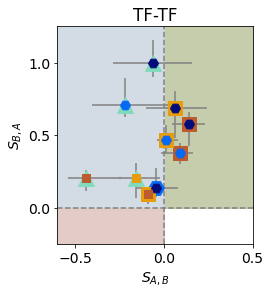

In [35]:
# Synergy plot for WT data
#Fig3 main

af1="ZF(WT)"
af2="ZF(WT)"
fig,ax=plt.subplots(1,1,figsize=(3.5,4))
subdf=dfsyn[(dfsyn["af1"]==af1)&(dfsyn["af2"]==af2)]

ax.set_xticks(np.arange(-1,2.5,0.5))
ax.set_yticks(np.arange(-1,2.5,0.5))
ax.set_xlim(-0.6,0.5)
ax.set_ylim(-0.25,1.25)
ax.fill_between([0,1],2,color=green,zorder=1)
ax.fill_between([-1,0],2,color=blue,zorder=1)
ax.fill_between([-1,0],-1,color=red,zorder=1)

for n1 in range(len(TFnames)-2):
    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2,len(data))
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        print(SABlist)
        print(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        #ax.scatter(SABlist, SBAlist, color="gray",alpha=0.5,zorder=2)
        ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')
        m1=markers[TF1]
        m2=markers[TF2]
        if m1=="s" and m2=="s":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=50,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=200,color=colorsnew[TF2],zorder=3)
        elif m1=="s" and m2=="H":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=200,color=colorsnew[TF1],zorder=3)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=100,color=colorsnew[TF2],zorder=4)
        elif m1=="H" and m2=="s":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=100,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=200,color=colorsnew[TF2],zorder=3)
        elif m1=="s" and m2=="^":
            
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=50,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=250,color=colorsnew[TF2],zorder=3)
        else:
            if TF1=="HSF1" and TF2=="BRD4":
                ax.scatter(mSAB,mSBA,marker=markers[TF1],s=250,color=colorsnew[TF1],zorder=3)
                ax.scatter(mSAB,mSBA,marker=markers[TF2],s=100,color=colorsnew[TF2],zorder=4)
                
            else:
                ax.scatter(mSAB,mSBA,marker=markers[TF2],s=250,color=colorsnew[TF2],zorder=3)
                ax.scatter(mSAB,mSBA,marker=markers[TF1],s=100,color=colorsnew[TF1],zorder=4)

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')


#ax.scatter(SABIF,SBAIF,marker="o",color="k",s=100,zorder=1)        

ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)

#ax.legend(loc=lc,bbox_to_anchor=bbox,ncol=2)
ax.axhline(y=0,linestyle='--',color='grey')
ax.axvline(x=0,linestyle='--',color='grey')
ax.set_title("TF-TF")
#plt.savefig('./files/WT.pdf',bbox_inches='tight')
plt.show()

In [30]:
import alphashape
from descartes import PolygonPatch

cMyc SP1 3
[0.04439412 0.14249287 0.23346239]
[0.42584902 0.65490106 0.65874701]
c-S
cMyc HSF1m 3
[-0.09830207  0.05072267  0.24422971]
[0.47974319 0.80716175 0.76921089]
c-m
cMyc HSF1 3
[-0.2836463  -0.05998485  0.15679156]
[0.89955209 1.1567951  0.93954215]
c-H
cMyc BRD4 4
[-0.15545452 -0.08017035 -0.02959478  0.07897846]
[0.08500525 0.0746388  0.11807508 0.27103133]
c-B
SP1 HSF1m 3
[-0.0697018  -0.12142566 -0.07594417]
[0.14367036 0.12260524 0.02375239]
S-m
SP1 HSF1 4
[-0.4922736  -0.53985299 -0.47118673 -0.241746  ]
[0.20538742 0.26189051 0.23318503 0.11571997]
S-H
SP1 BRD4 4
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
HSF1m HSF1 4
[-0.1674019  -0.17471952 -0.25514447 -0.02374169]
[0.06482813 0.30956933 0.20519639 0.23402772]
m-H
HSF1m BRD4 4
[ 0.03990926 -0.03962891 -0.03606419  0.07987063]
[0.37749475 0.49378424 0.57270503 0.41279894]
m-B
HSF1 BRD4 4
[-0.34238296 -0.40420837 -0.17875064  0.05571382]
[0.67531904 0.62418088 0.

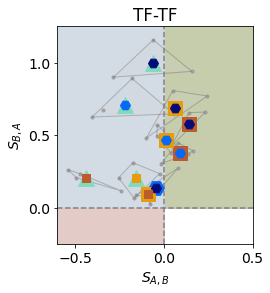

In [45]:
# Synergy plot for WT data with the individual datapoints
#FigS4 F

af1="ZF(WT)"
af2="ZF(WT)"
fig,ax=plt.subplots(1,1,figsize=(3.5,4))
subdf=dfsyn[(dfsyn["af1"]==af1)&(dfsyn["af2"]==af2)]

ax.set_xticks(np.arange(-1,2.5,0.5))
ax.set_yticks(np.arange(-1,2.5,0.5))
ax.set_xlim(-0.6,0.5)
ax.set_ylim(-0.25,1.25)
ax.fill_between([0,1],2,color=green,zorder=1)
ax.fill_between([-1,0],2,color=blue,zorder=1)
ax.fill_between([-1,0],-1,color=red,zorder=1)

for n1 in range(len(TFnames)-2):
    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2,len(data))
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        print(SABlist)
        print(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        points=[]
        for j in range(len(SABlist)):
            if SABlist[j] and SBAlist[j]:
                x=SABlist[j]
                y=SBAlist[j]
                ax.scatter(x,y,color="lightgray",s=5)
                points.append([x,y])
        area=0
        alpha0=0.01
        ntrials=1
        while area<1e-10 and ntrials<50:
            alpha=alpha0*ntrials
            ashape=alphashape.alphashape(points,alpha=alpha)
            ntrials+=1
            #print("alpha", alpha)
            area=ashape.area
        if len(points)<3:
            ax.plot([x[0] for x in points],[x[1] for x in points],color="lightgray")
        else:
            if area<1e-10:
                print("not alphashape for", TF1, TF2, af)
            else:
                ax.add_patch(PolygonPatch(ashape, alpha=0.2,fc="lightgray"))
        ax.scatter(SABlist, SBAlist, color="gray",alpha=0.5,zorder=2,s=10)
        #ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2,capsize=2) #,linestyle=':')
        m1=markers[TF1]
        m2=markers[TF2]
        if m1=="s" and m2=="s":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=50,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=200,color=colorsnew[TF2],zorder=3)
        elif m1=="s" and m2=="H":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=200,color=colorsnew[TF1],zorder=3)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=100,color=colorsnew[TF2],zorder=4)
        elif m1=="H" and m2=="s":
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=100,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=200,color=colorsnew[TF2],zorder=3)
        elif m1=="s" and m2=="^":
            
            ax.scatter(mSAB,mSBA,marker=markers[TF1],s=50,color=colorsnew[TF1],zorder=4)
            ax.scatter(mSAB,mSBA,marker=markers[TF2],s=250,color=colorsnew[TF2],zorder=3)
        else:
            if TF1=="HSF1" and TF2=="BRD4":
                ax.scatter(mSAB,mSBA,marker=markers[TF1],s=250,color=colorsnew[TF1],zorder=3)
                ax.scatter(mSAB,mSBA,marker=markers[TF2],s=100,color=colorsnew[TF2],zorder=4)
                
            else:
                ax.scatter(mSAB,mSBA,marker=markers[TF2],s=250,color=colorsnew[TF2],zorder=3)
                ax.scatter(mSAB,mSBA,marker=markers[TF1],s=100,color=colorsnew[TF1],zorder=4)

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')


#ax.scatter(SABIF,SBAIF,marker="o",color="k",s=100,zorder=1)        

ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)

#ax.legend(loc=lc,bbox_to_anchor=bbox,ncol=2)
ax.axhline(y=0,linestyle='--',color='grey')
ax.axvline(x=0,linestyle='--',color='grey')
ax.set_title("TF-TF")
plt.savefig('../../../work2/papersyn/figs/panels/synspaceWT_withpoints.pdf',bbox_inches='tight')
plt.show()

v1 [1.68539994 1.64027671 1.929     ]
v2 [2.51600753 2.77094543 2.77566667]
e1 cMyc [1.64027671 1.929     ]
e2 HSF1m [2.51600753 2.77566667]
e12 [2.35028249 3.28766667]
error [[0.11128217 0.17153234 0.48573387]
 [0.17744112 0.08812679 0.45165031]]
v1 [2.40083799 2.33973866 2.59033333]
v2 [2.78351955 2.77094543 2.77566667]
e1 SP1 [2.33973866 2.59033333]
e2 HSF1m [2.77094543 2.78351955]
e12 [2.54727133 2.65223464]
error [[0.103898   0.00576512 0.0636751 ]
 [0.14669667 0.006809   0.0412882 ]]
v1 [2.81991814 2.78351955 2.77094543 2.77566667]
v2 [3.31241473 3.89385475 3.81245196 3.31866667]
e1 HSF1m [2.77330605 2.80885528]
e2 HSF1 [3.3155407  3.85315335]
e12 [3.01075833 3.38590695]
error [[0.0142064  0.26880633 0.20379391]
 [0.02134283 0.26880633 0.17135471]]
v1 [1.99107939 1.92318436 1.8170638  2.20366667]
v2 [2.51600753 2.78351955 2.77094543 2.77566667]
e1 BRD4 [1.8605677  2.13354609]
e2 HSF1m [2.57974201 2.78037602]
e12 [2.61556871 2.87588413]
error [[0.12318086 0.13179279 0.11715208]
 [

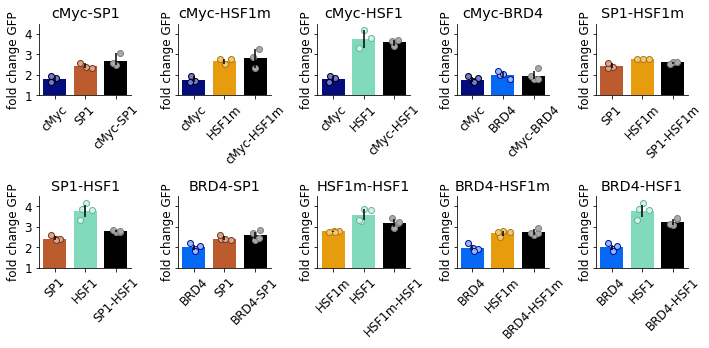

In [60]:
# Now plot barplots for individual TF pairs
#Fig S4 F
mpl.rcParams["font.size"]=12

af1="ZF(WT)"
af2="ZF(WT)"

subdf=dfsyn[(dfsyn["af1"]==af1)&(dfsyn["af2"]==af2)]

fig,axes=plt.subplots(2,5,figsize=(10,5),sharey=True)
nplot=0
np.random.seed(1)
for n1 in range(len(TFnames)-2):
    for n2 in range(n1+1,len(TFnames)-1):
        #TF1,TF2=TFcombi.split('-')
        TF1=TFnames[n1]
        TF2=TFnames[n2]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        v1=data["fcGFP1"].values
        v2=data["fcGFP2"].values
        v12=data["fcGFPAB"].values
        #print(TF1,TF2,v1,v2)
        #SABlist=data["SAB"].values
        #SBAlist=data["SBA"].values
        
        mv1=np.nanmean(v1)
        mv2=np.nanmean(v2)
        mv12=np.nanmean(v12)
        #print(v12,mv12)
        
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        
        if mv2<mv1:
            mv1_=mv1
            v1_=v1
            TF1_=TF1
            
            mv1=mv2
            mv2=mv1_
            v1=v2
            v2=v1_
            TF1=TF2
            TF2=TF1_
            
        #error is the range of the data
        #yerr=np.array([[mv1-min(v1),max(v1)-mv1],[mv2-min(v2),max(v2)-mv2],[mv12-min(v12),max(v12)-mv12]]).reshape(2,3)
        
            
        v1=v1[~np.isnan(v1)]
        v2=v2[~np.isnan(v2)]
        v12=v12[~np.isnan(v12)]
        yerr1=compute_percentiles(v1)
        yerr2=compute_percentiles(v2)
        yerr12=compute_percentiles(v12)
        yerr=np.array([[mv1-yerr1[0],mv2-yerr2[0],mv12-yerr12[0]],[yerr1[1]-mv1,yerr2[1]-mv2,yerr12[1]-mv12]])

        
        if TF1=="HSF1m" or TF2=="HSF1m":
            print("v1",v1)
            print("v2",v2)
            print("e1",TF1,yerr1)
            print("e2",TF2,yerr2)
            print("e12",yerr12)
            
            print("error",yerr)
        
        #fig,ax=plt.subplots(1,1,figsize=(3,3))
        ax=axes[nplot//5,nplot%5]
        ax.set_title(TF1+"-"+TF2)
        colors_=[colorsnew[TF1],colorsnew[TF2],"k"]
        patches=ax.bar(range(3),[mv1,mv2,mv12],yerr=yerr,color=colors_,width=0.75) #,color=colorsdict[key],marker='o') #,linestyle=':')
        for v,vallist in enumerate([v1,v2,v12]):
            for val in vallist:
                if v==0:
                    color=colorsnew3[TF1]
                    color2=colorsnew2[TF1]
                elif v==1:
                    color=colorsnew3[TF2]
                    color2=colorsnew2[TF2]
                else:
                    color="darkgray"
                    color2="gray"
                ax.scatter(v+np.random.uniform(-0.25,0.25),val,color=color,edgecolor=color2)

        #for p in range(2):
            #patch=patches[p]
            #patch.set_alpha(0.5)
        ax.set_xticks(range(3))
        ax.set_xticklabels([TF1,TF2,TF1+"-"+TF2],rotation=45)
        ax.set_ylim(1,4.5)
        ax.set_yticks([1,2,3,4])
        ax.set_ylabel("fold change GFP")
        nplot+=1
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("../../../work2/papersyn/figs/panels/WTdetail_withpoints.pdf",bbox_inches="tight")
plt.show()


cMyc empty 3
SP1 empty 4
HSF1m empty 3
HSF1 empty 4
BRD4 empty 4


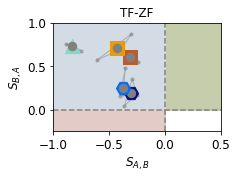

In [31]:
# WT-empty
#Fig S4 E

fontsize=12
af1="ZF(WT)"
af2="ZF(WT)"
fig,ax=plt.subplots(1,1,figsize=(3,2))
ax.set_xticks(np.arange(-1,2.5,0.5))
ax.set_yticks(np.arange(-1,2.5,0.5))
ax.set_xlim(-1,0.5)

ax.set_ylim(-0.25,1)


ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
ax.tick_params(axis='both',labelsize=fontsize)

#ax.legend(loc=lc,bbox_to_anchor=bbox,ncol=2)
ax.axhline(y=0,linestyle='--',color='grey')
ax.axvline(x=0,linestyle='--',color='grey')
ax.set_title("TF-ZF",fontsize=fontsize)
ax.fill_between([0,1],2,color=green,zorder=1)
ax.fill_between([-1,0],2,color=blue,zorder=1)
ax.fill_between([-1,0],-1,color=red,zorder=1)

subdf=dfsyn[(dfsyn["af1"]==af1)&(dfsyn["af2"]==af2)]

for n1 in range(len(TFnames)-1):
    n2=len(TFnames)-1
    #TF1,TF2=TFcombi.split('-')
    TF1=TFnames[n1]
    TF2=TFnames[n2]
    data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
    print(TF1,TF2,len(data))
    SABlist=data["SAB"].values
    SBAlist=data["SBA"].values
    mSAB=np.mean(SABlist)
    mSBA=np.mean(SBAlist)
    #error is the range of the data
    xerr=np.array([[mSAB-min(SABlist)],[max(SABlist)-mSAB]])
    yerr=np.array([[mSBA-min(SBAlist)],[max(SBAlist)-mSBA]])
    if TF1!="HSF1m":
        i1=TF1[0]
    else:
        i1="m"
    if TF2!="HSF1m":
        i2=TF2[0]
    else:
        i2="m"
    key="-".join([i1,i2])
    
    points=[]
    for j in range(len(SABlist)):
        if SABlist[j] and SBAlist[j]:
            x=SABlist[j]
            y=SBAlist[j]
            ax.scatter(x,y,color="lightgray",s=5)
            points.append([x,y])
    area=0
    alpha0=0.01
    ntrials=1
    while area<1e-10 and ntrials<50:
        alpha=alpha0*ntrials
        ashape=alphashape.alphashape(points,alpha=alpha)
        ntrials+=1
        #print("alpha", alpha)
        area=ashape.area
    if len(points)<3:
        ax.plot([x[0] for x in points],[x[1] for x in points],color="lightgray")
    else:
        if area<1e-10:
            print("not alphashape for", TF1, TF2, af)
        else:
            ax.add_patch(PolygonPatch(ashape, alpha=0.2,fc="lightgray"))
    ax.scatter(SABlist, SBAlist, color="gray",alpha=0.5,zorder=2,s=10)
    
    
    #ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')
    m1=markers[TF1]
    m2="o"
    
    ax.scatter(mSAB,mSBA,marker=m1,s=200,color=colorsnew[TF1],zorder=3)
    ax.scatter(mSAB,mSBA,marker=m2,s=70,color="gray",zorder=3)
    
    
#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')

plt.savefig('../../../work2/papersyn/figs/panels/WT_empty_points.pdf',bbox_inches='tight')
plt.show()

cMyc SP1 3
[0.04439412 0.14249287 0.23346239]
[0.42584902 0.65490106 0.65874701]
c-S
cMyc SP1 3
[-0.12376537 -0.01718537  0.3035464 ]
[0.75977839 0.59232873 0.85911421]
c-S
cMyc SP1 3
[-0.12766505 -0.24005109  0.25434068]
[0.68042314 0.95970353 1.03268427]
c-S
SP1 BRD4 4
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
SP1 BRD4 3
[-0.12230589  0.20582435  0.00569658]
[0.50999583 0.6274254  0.41991156]
S-B
SP1 BRD4 3
[-0.15352435 -0.13059995  0.02617915]
[0.51752713 0.69663625 0.70448369]
S-B
cMyc HSF1 3
[-0.2836463  -0.05998485  0.15679156]
[0.89955209 1.1567951  0.93954215]
c-H
cMyc HSF1 3
[-0.19275293 -0.15691711 -0.02856438]
[1.10373279 0.84828649 0.8973515 ]
c-H
cMyc HSF1 3
[-0.35705262 -0.24905018  0.05664149]
[0.66755142 0.89706648 0.82380974]
c-H
HSF1m BRD4 4
[ 0.03990926 -0.03962891 -0.03606419  0.07987063]
[0.37749475 0.49378424 0.57270503 0.41279894]
m-B
HSF1m BRD4 3
[-0.06106515 -0.17205265  0.18127099]
[0.35294406 0.6018282

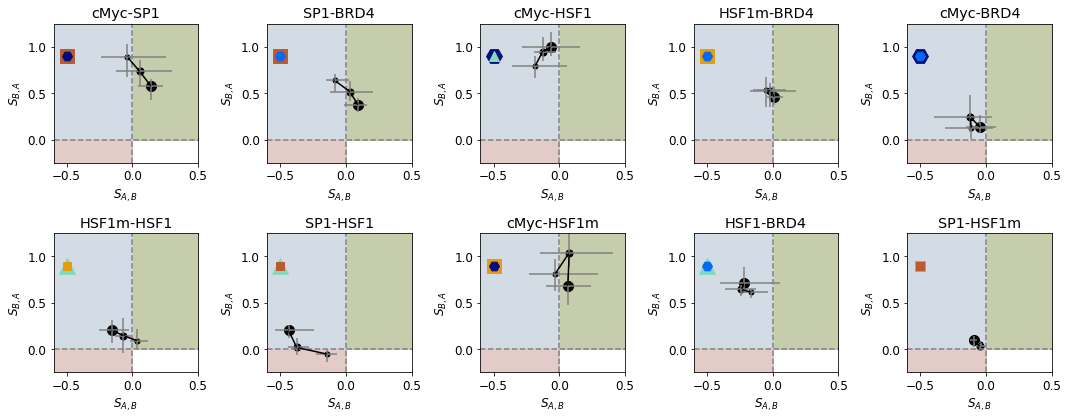

In [32]:
#Now synergy for the affinity mutants
#Now synergy for the affinity mutants

sizes_affinity={"ZF(WT)":100,"ZF(5X)":50,"ZF(7X)":25}

fig,axes=plt.subplots(2,5,figsize=(15,6))
i=-1

#for n1 in range(len(TFnames)-2):
#    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
for TFcombi in ["cMyc-SP1", "SP1-BRD4","cMyc-HSF1","HSF1m-BRD4","cMyc-BRD4","HSF1m-HSF1","SP1-HSF1","cMyc-HSF1m","HSF1-BRD4","SP1-HSF1m"]:
    TF1,TF2=TFcombi.split('-')
    #TF1=TFnames[n1]
    #TF2=TFnames[n2]
    all_means=[]
    i+=1
    ax=axes[i//5][i%5]
    ax.set_xticks(np.arange(-1,2.5,0.5))
    ax.set_yticks(np.arange(-1,2.5,0.5))
    ax.set_xlim(-0.6,0.5)
    ax.set_ylim(-0.25,1.25)
    ax.fill_between([0,1],2,color=green,zorder=1)
    ax.fill_between([-1,0],2,color=blue,zorder=1)
    ax.fill_between([-1,0],-1,color=red,zorder=1)
    ax.axhline(y=0,linestyle='--',color='grey')
    ax.axvline(x=0,linestyle='--',color='grey')
    ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
    ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)

    ax.set_title(TF1+"-"+TF2)
    for af in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
        subdf=dfsyn[(dfsyn["af1"]==af)&(dfsyn["af2"]==af)]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2,len(data))
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        print(SABlist)
        print(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')

        ax.scatter(mSAB,mSBA,color="k",s=sizes_affinity[af])
        all_means.append([mSAB,mSBA])
        if af=="ZF(WT)":#pair logo
            m1=markers[TF1]
            m2=markers[TF2]
            top_corner_x=-0.5
            top_corner_y=0.9
            if m1=="s" and m2=="s":
                s1=50
                s2=100
                z1=4
                z2=3
            elif m1=="s" and m2=="H":
                s1=200
                s2=100
                z1=3
                z2=4
            elif m1=="H" and m2=="s":
                s1=100
                s2=200
                z1=4
                z2=3
            elif m1=="s" and m2=="^":
                s1=50
                s2=250
                z1=4
                z2=3

            else:
                if TF1=="HSF1" and TF2=="BRD4":
                    s1=250
                    s2=100
                    z1=3
                    x2=4
                else:
                    s1=250
                    s2-100
                    z1=3
                    z2=4

            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF1],s=s1,color=colorsnew[TF1],zorder=z1)
            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF2],s=s2,color=colorsnew[TF2],zorder=z2)
    ax.plot([x[0] for x in all_means],[x[1] for x in all_means],color="k")

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')



plt.tight_layout()
#plt.savefig('./files/affinities.pdf',bbox_inches='tight')
plt.show()

cMyc SP1 3
[0.04439412 0.14249287 0.23346239]
[0.42584902 0.65490106 0.65874701]
c-S
cMyc SP1 3
[-0.12376537 -0.01718537  0.3035464 ]
[0.75977839 0.59232873 0.85911421]
c-S
cMyc SP1 3
[-0.12766505 -0.24005109  0.25434068]
[0.68042314 0.95970353 1.03268427]
c-S
WT SBA < 7X SBA
SP1 BRD4 4
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
SP1 BRD4 3
[-0.12230589  0.20582435  0.00569658]
[0.50999583 0.6274254  0.41991156]
S-B
SP1 BRD4 3
[-0.15352435 -0.13059995  0.02617915]
[0.51752713 0.69663625 0.70448369]
S-B
WT SBA < 7X SBA
cMyc HSF1 3
[-0.2836463  -0.05998485  0.15679156]
[0.89955209 1.1567951  0.93954215]
c-H
cMyc HSF1 3
[-0.19275293 -0.15691711 -0.02856438]
[1.10373279 0.84828649 0.8973515 ]
c-H
cMyc HSF1 3
[-0.35705262 -0.24905018  0.05664149]
[0.66755142 0.89706648 0.82380974]
c-H
WT SBA > 7X SBA
HSF1m BRD4 4
[ 0.03990926 -0.03962891 -0.03606419  0.07987063]
[0.37749475 0.49378424 0.57270503 0.41279894]
m-B
HSF1m BRD4 3
[-0.0610651

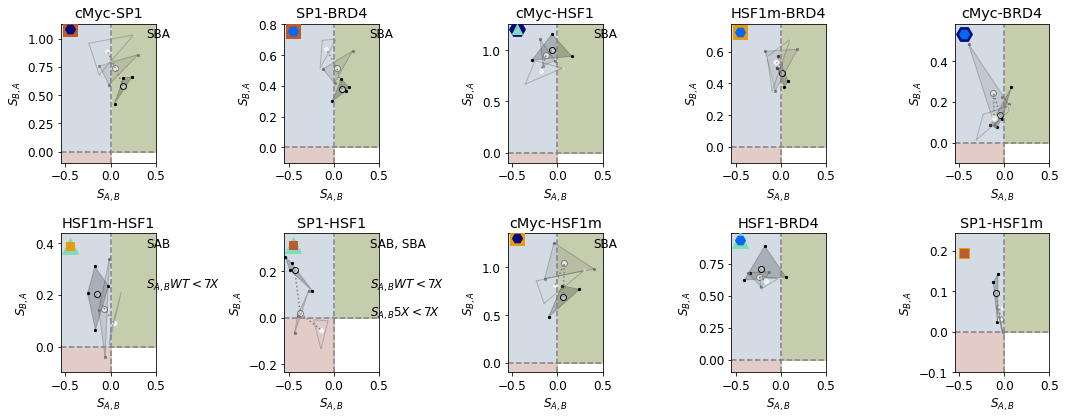

In [34]:
#Now synergy for the affinity mutants
#Now synergy for the affinity mutants

sizes_affinity={"ZF(WT)":100,"ZF(5X)":50,"ZF(7X)":25}
colors_af={"ZF(WT)":"k","ZF(5X)":"gray","ZF(7X)":"lightgray"}
fig,axes=plt.subplots(2,5,figsize=(15,6))
i=-1

#for n1 in range(len(TFnames)-2):
#    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
for TFcombi in ["cMyc-SP1", "SP1-BRD4","cMyc-HSF1","HSF1m-BRD4","cMyc-BRD4","HSF1m-HSF1","SP1-HSF1","cMyc-HSF1m","HSF1-BRD4","SP1-HSF1m"]:
    TF1,TF2=TFcombi.split('-')
    #TF1=TFnames[n1]
    #TF2=TFnames[n2]
    all_means=[]
    i+=1
    ax=axes[i//5][i%5]
    

    ax.set_title(TF1+"-"+TF2)
    xmin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    xmax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    ymin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    ymax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    if xmin>-0.1:
        xmin=-0.1
    else:
        xmin=xmin-0.1
    if xmax<0.1:
        xmax=0.1
    else:
        xmax=xmax+0.1
    if ymin>-0.1:
        ymin=-0.1
    else:
        ymin=ymin-0.1
    if ymax<0.1:
        ymax=0.1
    else:
        ymax=ymax+0.1
    xmin=-0.55
    xmax=0.5
    #ax.set_xticks(,2.5,0.5))
    #ax.set_yticks(np.arange(-1,2.5,0.5))
    ax.fill_between([0,1],2,color=green,zorder=1)
    ax.fill_between([-1,0],2,color=blue,zorder=1)
    ax.fill_between([-1,0],-1,color=red,zorder=1)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.axhline(y=0,linestyle='--',color='grey')
    ax.axvline(x=0,linestyle='--',color='grey')
    ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
    ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    SABs_all=[]
    SBAs_all=[]
    for af in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
        subdf=dfsyn[(dfsyn["af1"]==af)&(dfsyn["af2"]==af)]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2,len(data))
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        print(SABlist)
        print(SBAlist)
        SABs_all.append(SABlist)
        SBAs_all.append(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        #ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')

        ax.scatter(mSAB,mSBA,facecolor="w",edgecolor=colors_af[af]) #,s=sizes_affinity[af])
        all_means.append([mSAB,mSBA])
        
        points=[]
        for j in range(len(SABlist)):
            if SABlist[j] and SBAlist[j]:
                x=SABlist[j]
                y=SBAlist[j]
                ax.scatter(x,y,color=colors_af[af],s=5)
                points.append([x,y])
        area=0
        alpha0=0.01
        ntrials=1
        while area<1e-10 and ntrials<50:
            alpha=alpha0*ntrials
            ashape=alphashape.alphashape(points,alpha=alpha)
            ntrials+=1
            #print("alpha", alpha)
            area=ashape.area
        if len(points)<3:
            ax.plot([x[0] for x in points],[x[1] for x in points],color=colors_af[af])
        else:
            if area<1e-10:
                print("not alphashape for", TF1, TF2, af)
            else:
                ax.add_patch(PolygonPatch(ashape, alpha=0.2,fc=colors_af[af]))
        
        if af=="ZF(WT)":#pair logo
            m1=markers[TF1]
            m2=markers[TF2]
            top_corner_x=xmin+0.1
            top_corner_y=ymax-0.05
            if m1=="s" and m2=="s":
                s1=50
                s2=100
                z1=4
                z2=3
            elif m1=="s" and m2=="H":
                s1=200
                s2=100
                z1=3
                z2=4
            elif m1=="H" and m2=="s":
                s1=100
                s2=200
                z1=4
                z2=3
            elif m1=="s" and m2=="^":
                s1=50
                s2=250
                z1=4
                z2=3

            else:
                if TF1=="HSF1" and TF2=="BRD4":
                    s1=250
                    s2=100
                    z1=3
                    x2=4
                else:
                    s1=250
                    s2-100
                    z1=3
                    z2=4

            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF1],s=s1,color=colorsnew[TF1],zorder=z1)
            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF2],s=s2,color=colorsnew[TF2],zorder=z2)
    ax.plot([x[0] for x in all_means],[x[1] for x in all_means],color="gray",linestyle=":")
    SABdif=False
    threshold=0.1
    #first check that the means are different by 0.1, then check that all repeats are non-overlaping
    if (all_means[0][0]>all_means[1][0]+threshold) and np.nanmin(SABs_all[0])>np.nanmax(SABs_all[1]):
        ax.text(0.9,0.9,"$S_{A,B}WT>5X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[0][0]<all_means[1][0]-threshold) and np.nanmax(SABs_all[0])<np.nanmin(SABs_all[1]):
        ax.text(0.9,0.8,"$S_{A,B}WT<5X$",transform=ax.transAxes)
        SABdif=True
        
    if (all_means[0][0]>all_means[2][0]+threshold) and np.nanmin(SABs_all[0])>np.nanmax(SABs_all[2]):
        ax.text(0.9,0.7,"$S_{A,B}WT>7X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[0][0]<all_means[2][0]-threshold) and np.nanmax(SABs_all[0])<np.nanmin(SABs_all[2]):
        ax.text(0.9,0.6,"$S_{A,B}WT<7X$",transform=ax.transAxes)
        SABdif=True
    
    if (all_means[1][0]>all_means[2][0]+threshold) and np.nanmin(SABs_all[1])>np.nanmax(SABs_all[2]):
        ax.text(0.9,0.5,"$S_{A,B}5X>7X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[1][0]<all_means[2][0]-threshold) and np.nanmax(SABs_all[1])<np.nanmin(SABs_all[2]):
        ax.text(0.9,0.4,"$S_{A,B}5X<7X$",transform=ax.transAxes)
        SABdif=True
    
    
    
        
    SBAdif=False
    if (all_means[0][1]>all_means[1][1]+threshold) and np.nanmin(SBAs_all[0])>np.nanmax(SBAs_all[1]):
        print("WT SBA > 5X SBA")
        SBAdif=True
    if (all_means[0][1]>all_means[2][1]+threshold) and np.nanmin(SBAs_all[0])>np.nanmax(SBAs_all[2]):
        print("WT SBA > 7X SBA")
        SBAdif=True
    if (all_means[0][1]<all_means[1][1]-threshold)and np.nanmax(SBAs_all[0])<np.nanmin(SBAs_all[1]):
        print("WT SBA < 5X SBA")
        SBAdif=True
    if (all_means[0][1]<all_means[2][1]-threshold)and np.nanmax(SBAs_all[0])<np.nanmin(SBAs_all[2]):
        print("WT SBA < 7X SBA")
        SBAdif=True

        
    if SABdif and SBAdif:
        ax.text(0.9,0.9,"SAB, SBA",transform=ax.transAxes)
    elif SABdif:
        ax.text(0.9,0.9,"SAB",transform=ax.transAxes)
    elif SBAdif:
        ax.text(0.9,0.9,"SBA",transform=ax.transAxes)

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')



plt.tight_layout()
#plt.savefig('/Users/rosamartinezcorral/Dropbox (HMS)/work2/papersyn/figs/panels/affinitiesv2.pdf',bbox_inches='tight')
plt.show()

HSF1m HSF1 4
[-0.1674019  -0.17471952 -0.25514447 -0.02374169]
[0.06482813 0.30956933 0.20519639 0.23402772]
m-H
HSF1m HSF1 3
[-0.06043741 -0.13137635 -0.01391023]
[-0.03988167  0.13998641  0.33819602]
m-H
HSF1m HSF1 3
[-0.01567507 -0.00078089  0.12064582]
[0.00729249 0.05330663 0.21527418]
m-H
!!!! HSF1m HSF1 SAB
SP1 HSF1 4
[-0.4922736  -0.53985299 -0.47118673 -0.241746  ]
[0.20538742 0.26189051 0.23318503 0.11571997]
S-H
SP1 HSF1 3
[-0.40425704 -0.28001517 -0.43728598]
[ 0.00868492  0.11567432 -0.0669379 ]
S-H
SP1 HSF1 3
[-0.22533971 -0.06657702 -0.14513341]
[-0.00882385 -0.01293906 -0.13395808]
S-H
WT SBA > 5X SBA
WT SBA > 7X SBA
!!!! SP1 HSF1 SAB, SBA
SP1 BRD4 4
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
SP1 BRD4 3
[-0.12230589  0.20582435  0.00569658]
[0.50999583 0.6274254  0.41991156]
S-B
SP1 BRD4 3
[-0.15352435 -0.13059995  0.02617915]
[0.51752713 0.69663625 0.70448369]
S-B
WT SBA < 7X SBA
!!!! SP1 BRD4 SBA
cMyc SP1 3
[0.0

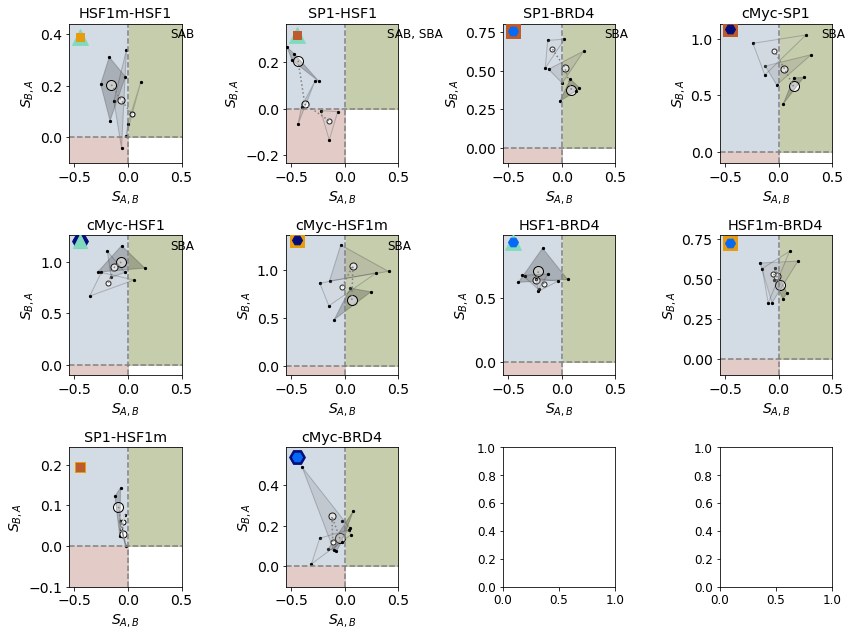

In [36]:
#As above, without printing text
#Figure S7

sizes_affinity={"ZF(WT)":100,"ZF(5X)":50,"ZF(7X)":25}
colors_af={"ZF(WT)":"k","ZF(5X)":"gray","ZF(7X)":"lightgray"}
fig,axes=plt.subplots(3,4,figsize=(12,9))
i=-1

#for n1 in range(len(TFnames)-2):
#    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
for TFcombi in ["HSF1m-HSF1","SP1-HSF1","SP1-BRD4","cMyc-SP1", "cMyc-HSF1","cMyc-HSF1m","HSF1-BRD4","HSF1m-BRD4","SP1-HSF1m","cMyc-BRD4"]:
    TF1,TF2=TFcombi.split('-')
    #TF1=TFnames[n1]
    #TF2=TFnames[n2]
    all_means=[]
    i+=1
    ax=axes[i//4][i%4]
    

    ax.set_title(TF1+"-"+TF2)
    xmin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    xmax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    ymin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    ymax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    if xmin>-0.1:
        xmin=-0.1
    else:
        xmin=xmin-0.1
    if xmax<0.1:
        xmax=0.1
    else:
        xmax=xmax+0.1
    if ymin>-0.1:
        ymin=-0.1
    else:
        ymin=ymin-0.1
    if ymax<0.1:
        ymax=0.1
    else:
        ymax=ymax+0.1
    xmin=-0.55
    xmax=0.5
    #ax.set_xticks(,2.5,0.5))
    #ax.set_yticks(np.arange(-1,2.5,0.5))
    ax.fill_between([0,1],2,color=green,zorder=1)
    ax.fill_between([-1,0],2,color=blue,zorder=1)
    ax.fill_between([-1,0],-1,color=red,zorder=1)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.axhline(y=0,linestyle='--',color='grey')
    ax.axvline(x=0,linestyle='--',color='grey')
    ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
    ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    SABs_all=[]
    SBAs_all=[]
    for af in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
        subdf=dfsyn[(dfsyn["af1"]==af)&(dfsyn["af2"]==af)]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2,len(data))
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        print(SABlist)
        print(SBAlist)
        SABs_all.append(SABlist)
        SBAs_all.append(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        #ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')

        ax.scatter(mSAB,mSBA,facecolor="w",edgecolor="k",s=sizes_affinity[af])
        all_means.append([mSAB,mSBA])
        
        points=[]
        for j in range(len(SABlist)):
            if SABlist[j] and SBAlist[j]:
                x=SABlist[j]
                y=SBAlist[j]
                ax.scatter(x,y,color="k",s=5)
                points.append([x,y])
        area=0
        alpha0=0.01
        ntrials=1
        while area<1e-10 and ntrials<50:
            alpha=alpha0*ntrials
            ashape=alphashape.alphashape(points,alpha=alpha)
            ntrials+=1
            #print("alpha", alpha)
            area=ashape.area
        if len(points)<3:
            ax.plot([x[0] for x in points],[x[1] for x in points],color=colors_af[af])
        else:
            if area<1e-10:
                print("not alphashape for", TF1, TF2, af)
            else:
                ax.add_patch(PolygonPatch(ashape, alpha=0.2,fc=colors_af[af]))
        
        if af=="ZF(WT)":#pair logo
            m1=markers[TF1]
            m2=markers[TF2]
            top_corner_x=xmin+0.1
            top_corner_y=ymax-0.05
            if m1=="s" and m2=="s":
                s1=50
                s2=100
                z1=4
                z2=3
            elif m1=="s" and m2=="H":
                s1=200
                s2=100
                z1=3
                z2=4
            elif m1=="H" and m2=="s":
                s1=100
                s2=200
                z1=4
                z2=3
            elif m1=="s" and m2=="^":
                s1=50
                s2=250
                z1=4
                z2=3

            else:
                if TF1=="HSF1" and TF2=="BRD4":
                    s1=250
                    s2=100
                    z1=3
                    x2=4
                else:
                    s1=250
                    s2-100
                    z1=3
                    z2=4

            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF1],s=s1,color=colorsnew[TF1],zorder=z1)
            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF2],s=s2,color=colorsnew[TF2],zorder=z2)
    ax.plot([x[0] for x in all_means],[x[1] for x in all_means],color="gray",linestyle=":")
    SABdif=False
    threshold=0.1
    #first check that the means are different by 0.1, then check that all repeats are non-overlaping
    if (all_means[0][0]>all_means[1][0]+threshold) and np.nanmin(SABs_all[0])>np.nanmax(SABs_all[1]):
        #ax.text(0.9,0.9,"$S_{A,B}WT>5X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[0][0]<all_means[1][0]-threshold) and np.nanmax(SABs_all[0])<np.nanmin(SABs_all[1]):
        #ax.text(0.9,0.8,"$S_{A,B}WT<5X$",transform=ax.transAxes)
        SABdif=True
        
    if (all_means[0][0]>all_means[2][0]+threshold) and np.nanmin(SABs_all[0])>np.nanmax(SABs_all[2]):
        #ax.text(0.9,0.7,"$S_{A,B}WT>7X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[0][0]<all_means[2][0]-threshold) and np.nanmax(SABs_all[0])<np.nanmin(SABs_all[2]):
        #ax.text(0.9,0.6,"$S_{A,B}WT<7X$",transform=ax.transAxes)
        SABdif=True
    
    if (all_means[1][0]>all_means[2][0]+threshold) and np.nanmin(SABs_all[1])>np.nanmax(SABs_all[2]):
        #ax.text(0.9,0.5,"$S_{A,B}5X>7X$",transform=ax.transAxes)
        SABdif=True
    elif (all_means[1][0]<all_means[2][0]-threshold) and np.nanmax(SABs_all[1])<np.nanmin(SABs_all[2]):
        #ax.text(0.9,0.4,"$S_{A,B}5X<7X$",transform=ax.transAxes)
        SABdif=True
    
    
    
        
    SBAdif=False
    if (all_means[0][1]>all_means[1][1]+threshold) and np.nanmin(SBAs_all[0])>np.nanmax(SBAs_all[1]):
        print("WT SBA > 5X SBA")
        SBAdif=True
    if (all_means[0][1]>all_means[2][1]+threshold) and np.nanmin(SBAs_all[0])>np.nanmax(SBAs_all[2]):
        print("WT SBA > 7X SBA")
        SBAdif=True
    if (all_means[0][1]<all_means[1][1]-threshold)and np.nanmax(SBAs_all[0])<np.nanmin(SBAs_all[1]):
        print("WT SBA < 5X SBA")
        SBAdif=True
    if (all_means[0][1]<all_means[2][1]-threshold)and np.nanmax(SBAs_all[0])<np.nanmin(SBAs_all[2]):
        print("WT SBA < 7X SBA")
        SBAdif=True

        
    
    if SABdif and SBAdif:
        print("!!!!",TF1,TF2,"SAB, SBA")
        ax.text(0.9,0.9,"SAB, SBA",transform=ax.transAxes)
    elif SABdif:
        print("!!!!",TF1,TF2,"SAB")
        ax.text(0.9,0.9,"SAB",transform=ax.transAxes)
    elif SBAdif:
        print("!!!!",TF1,TF2,"SBA")
        ax.text(0.9,0.9,"SBA",transform=ax.transAxes)

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')



plt.tight_layout()
plt.savefig('/Users/rosamartinezcorral/Dropbox (HMS)/work2/papersyn/figs/panels/affinities_triangles.pdf',bbox_inches='tight')
plt.show()

cMyc SP1 ZF(WT)
[0.04439412 0.14249287 0.23346239]
[0.42584902 0.65490106 0.65874701]
c-S
cMyc SP1 ZF(5X)
[-0.12376537 -0.01718537  0.3035464 ]
[0.75977839 0.59232873 0.85911421]
c-S
cMyc SP1 ZF(7X)
[-0.12766505 -0.24005109  0.25434068]
[0.68042314 0.95970353 1.03268427]
c-S
SP1 BRD4 ZF(WT)
[-0.01773309  0.16468835  0.08109233  0.13681139]
[0.3023079  0.3913341  0.44583065 0.37004313]
S-B
SP1 BRD4 ZF(5X)
[-0.12230589  0.20582435  0.00569658]
[0.50999583 0.6274254  0.41991156]
S-B
SP1 BRD4 ZF(7X)
[-0.15352435 -0.13059995  0.02617915]
[0.51752713 0.69663625 0.70448369]
S-B
cMyc HSF1 ZF(WT)
[-0.2836463  -0.05998485  0.15679156]
[0.89955209 1.1567951  0.93954215]
c-H
cMyc HSF1 ZF(5X)
[-0.19275293 -0.15691711 -0.02856438]
[1.10373279 0.84828649 0.8973515 ]
c-H
cMyc HSF1 ZF(7X)
[-0.35705262 -0.24905018  0.05664149]
[0.66755142 0.89706648 0.82380974]
c-H
HSF1m BRD4 ZF(WT)
[ 0.03990926 -0.03962891 -0.03606419  0.07987063]
[0.37749475 0.49378424 0.57270503 0.41279894]
m-B
HSF1m BRD4 ZF(5X)
[-0.

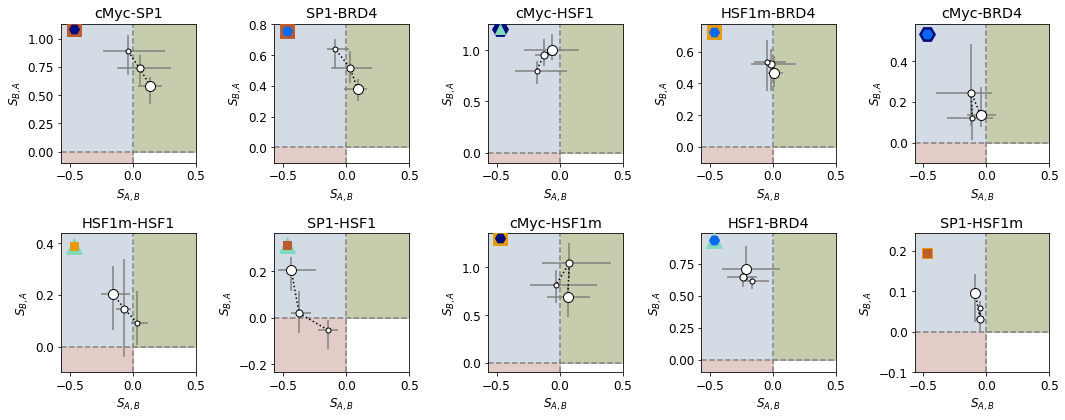

In [35]:
#Same as above, with error bars
#Figure 4C

sizes_affinity={"ZF(WT)":100,"ZF(5X)":50,"ZF(7X)":25}
colors_af={"ZF(WT)":"k","ZF(5X)":"gray","ZF(7X)":"lightgray"}
fig,axes=plt.subplots(2,5,figsize=(15,6))
i=-1

#for n1 in range(len(TFnames)-2):
#    for n2 in range(n1+1,len(TFnames)-1): #last one is empty, so not used for this plot
for TFcombi in ["cMyc-SP1", "SP1-BRD4","cMyc-HSF1","HSF1m-BRD4","cMyc-BRD4","HSF1m-HSF1","SP1-HSF1","cMyc-HSF1m","HSF1-BRD4","SP1-HSF1m"]:
    TF1,TF2=TFcombi.split('-')
    #TF1=TFnames[n1]
    #TF2=TFnames[n2]
    all_means=[]
    i+=1
    ax=axes[i//5][i%5]
    

    ax.set_title(TF1+"-"+TF2)
    xmin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    xmax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SAB"].values)
    ymin=np.nanmin(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    ymax=np.nanmax(dfsyn[(dfsyn["TF1"]==TF1)&(dfsyn["TF2"]==TF2)]["SBA"].values)
    if xmin>-0.1:
        xmin=-0.1
    else:
        xmin=xmin-0.1
    if xmax<0.1:
        xmax=0.1
    else:
        xmax=xmax+0.1
    if ymin>-0.1:
        ymin=-0.1
    else:
        ymin=ymin-0.1
    if ymax<0.1:
        ymax=0.1
    else:
        ymax=ymax+0.1
    xmin=-0.57
    xmax=0.5
    #ax.set_xticks(,2.5,0.5))
    #ax.set_yticks(np.arange(-1,2.5,0.5))
    ax.fill_between([0,1],2,color=green,zorder=1)
    ax.fill_between([-1,0],2,color=blue,zorder=1)
    ax.fill_between([-1,0],-1,color=red,zorder=1)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.axhline(y=0,linestyle='--',color='grey')
    ax.axvline(x=0,linestyle='--',color='grey')
    ax.set_xlabel(r'$S_{A,B}$',fontsize=fontsize)
    ax.set_ylabel(r'$S_{B,A}$',fontsize=fontsize)
    ax.tick_params(axis='both',labelsize=fontsize)
    
    SABs_all=[]
    SBAs_all=[]
    
    for af in ["ZF(WT)","ZF(5X)","ZF(7X)"]:
        subdf=dfsyn[(dfsyn["af1"]==af)&(dfsyn["af2"]==af)]
        data=subdf[(subdf["TF1"]==TF1)&(subdf["TF2"]==TF2)]
        print(TF1,TF2, af)
        SABlist=data["SAB"].values
        SBAlist=data["SBA"].values
        SABs_all.append(SABlist)
        SBAs_all.append(SBAlist)
        print(SABlist)
        print(SBAlist)
        mSAB=np.nanmean(SABlist)
        mSBA=np.nanmean(SBAlist)
        #error is the range of the data
        xerr=np.array([[mSAB-np.nanmin(SABlist)],[np.nanmax(SABlist)-mSAB]])
        yerr=np.array([[mSBA-np.nanmin(SBAlist)],[np.nanmax(SBAlist)-mSBA]])
        if TF1!="HSF1m":
            i1=TF1[0]
        else:
            i1="m"
        if TF2!="HSF1m":
            i2=TF2[0]
        else:
            i2="m"
        key="-".join([i1,i2])
        print(key)
        ax.errorbar(mSAB,mSBA,xerr=xerr,yerr=yerr,color="gray",marker='o',ms=1,zorder=2) #,linestyle=':')

        ax.scatter(mSAB,mSBA,facecolor="w",edgecolor="k",s=sizes_affinity[af],zorder=10)
        all_means.append([mSAB,mSBA])
        
        #points=[]
        #for j in range(len(SABlist)):
        #    if SABlist[j] and SBAlist[j]:
        #        x=SABlist[j]
        #        y=SBAlist[j]
        #        ax.scatter(x,y,color=colors_af[af],s=5)
        #        points.append([x,y])
        #area=0
        #alpha0=0.01
        #ntrials=1
        #while area<1e-10 and ntrials<50:
        #    alpha=alpha0*ntrials
        #    ashape=alphashape.alphashape(points,alpha=alpha)
        #    ntrials+=1
        #    #print("alpha", alpha)
        #    area=ashape.area
        #if len(points)<3:
        #    ax.plot([x[0] for x in points],[x[1] for x in points],color=colors_af[af])
        #else:
        #    if area<1e-10:
        #        print("not alphashape for", TF1, TF2, af)
        #    else:
        #        ax.add_patch(PolygonPatch(ashape, alpha=0.2,fc=colors_af[af]))
        
        if af=="ZF(WT)":#pair logo
            m1=markers[TF1]
            m2=markers[TF2]
            top_corner_x=xmin+0.1
            top_corner_y=ymax-0.05
            if m1=="s" and m2=="s":
                s1=50
                s2=100
                z1=4
                z2=3
            elif m1=="s" and m2=="H":
                s1=200
                s2=100
                z1=3
                z2=4
            elif m1=="H" and m2=="s":
                s1=100
                s2=200
                z1=4
                z2=3
            elif m1=="s" and m2=="^":
                s1=50
                s2=250
                z1=4
                z2=3

            else:
                if TF1=="HSF1" and TF2=="BRD4":
                    s1=250
                    s2=100
                    z1=3
                    x2=4
                else:
                    s1=250
                    s2-100
                    z1=3
                    z2=4

            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF1],s=s1,color=colorsnew[TF1],zorder=z1)
            ax.scatter(top_corner_x,top_corner_y,marker=markers[TF2],s=s2,color=colorsnew[TF2],zorder=z2)
    
    
    ax.plot([x[0] for x in all_means],[x[1] for x in all_means],color="k",linestyle=":")

#for key in colorsorder:
#    color=colorsdict[key]
#    ax.scatter(-10,-10,marker='o',color=color,label=key,s=50)
#ax.legend(loc='upper left',bbox_to_anchor=(1.025,1.05),ncol=1)
#ax.legend(loc='upper ')



plt.tight_layout()
#plt.savefig('/Users/rosamartinezcorral/Dropbox (HMS)/work2/papersyn/figs/panels/affinitiesv3.pdf',bbox_inches='tight')
plt.show()

In [38]:
dfsyn[(dfsyn["TF1"]=="HSF1m")&(dfsyn["TF2"]=="HSF1")]

,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
85,HSF1m,HSF1,ZF(WT),ZF(WT),-0.167402,0.064828,HSF1,Hm,2.949523,2.819918,3.312415
86,HSF1m,HSF1,ZF(WT),ZF(WT),-0.174720,0.309569,HSF1,WT-5,3.449721,2.783520,3.893855
87,HSF1m,HSF1,ZF(WT),ZF(WT),-0.255144,0.205196,HSF1,WT-7,3.194466,2.770945,3.812452
88,HSF1m,HSF1,ZF(WT),ZF(WT),-0.023742,0.234028,HSF1,all,3.264500,2.775667,3.318667
89,HSF1m,HSF1,ZF(5X),ZF(5X),-0.060437,-0.039882,HSF1,Hm,3.236698,3.327422,3.375171
90,HSF1m,HSF1,ZF(5X),ZF(5X),-0.131376,0.139986,HSF1,WT-5,3.655028,3.317039,4.003492
91,HSF1m,HSF1,ZF(5X),ZF(5X),-0.013910,0.338196,HSF1,all,3.991000,3.157000,4.029667
92,HSF1m,HSF1,ZF(7X),ZF(7X),-0.015675,0.007292,HSF1,Hm,2.435198,2.422920,2.461801
93,HSF1m,HSF1,ZF(7X),ZF(7X),-0.000781,0.053307,HSF1,WT-7,2.839354,2.736357,2.840892
94,HSF1m,HSF1,ZF(7X),ZF(7X),0.120646,0.215274,HSF1,all,3.122500,2.689667,2.872000


In [42]:
dfsyn[(dfsyn["TF1"]=="SP1")&(dfsyn["TF2"]=="HSF1")]

,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
55,SP1,HSF1,ZF(WT),ZF(WT),-0.492274,0.205387,HSF1,WT-5,2.768156,2.400838,3.893855
56,SP1,HSF1,ZF(WT),ZF(WT),-0.539853,0.261891,HSF1,WT-5-7,2.867587,2.391552,4.168968
57,SP1,HSF1,ZF(WT),ZF(WT),-0.471187,0.233185,HSF1,WT-7,2.750192,2.339739,3.812452
58,SP1,HSF1,ZF(WT),ZF(WT),-0.241746,0.115720,HSF1,all,2.806667,2.590333,3.318667
59,SP1,HSF1,ZF(5X),ZF(5X),-0.404257,0.008685,HSF1,WT-5,3.025140,3.006983,4.003492
60,SP1,HSF1,ZF(5X),ZF(5X),-0.280015,0.115674,HSF1,WT-5-7,2.973193,2.744110,3.610073
61,SP1,HSF1,ZF(5X),ZF(5X),-0.437286,-0.066938,HSF1,all,2.976000,3.117333,4.029667
62,SP1,HSF1,ZF(7X),ZF(7X),-0.225340,-0.008824,HSF1,WT-5-7,2.383428,2.398050,2.786353
63,SP1,HSF1,ZF(7X),ZF(7X),-0.066577,-0.012939,SP1,WT-7,2.815527,2.948501,2.840892
64,SP1,HSF1,ZF(7X),ZF(7X),-0.145133,-0.133958,SP1,all,2.617333,2.894333,2.872000


In [39]:
dfsyn[(dfsyn["TF1"]=="HSF1m")&(dfsyn["TF2"]=="BRD4")]

,TF1,TF2,af1,af2,SAB,SBA,TFA,name,fcGFPAB,fcGFP1,fcGFP2
95,HSF1m,BRD4,ZF(WT),ZF(WT),0.039909,0.377495,HSF1m,Dhana2108,2.586579,2.516008,1.991079
96,HSF1m,BRD4,ZF(WT),ZF(WT),-0.039629,0.493784,HSF1m,WT-5,2.708101,2.783520,1.923184
97,HSF1m,BRD4,ZF(WT),ZF(WT),-0.036064,0.572705,HSF1m,WT-7,2.702537,2.770945,1.817064
98,HSF1m,BRD4,ZF(WT),ZF(WT),0.079871,0.412799,HSF1m,all,2.933667,2.775667,2.203667
99,HSF1m,BRD4,ZF(5X),ZF(5X),-0.061065,0.352944,HSF1m,Dhana2108,2.842700,2.965606,2.225790
100,HSF1m,BRD4,ZF(5X),ZF(5X),-0.172053,0.601828,HSF1m,WT-5,2.944134,3.317039,1.939944
101,HSF1m,BRD4,ZF(5X),ZF(5X),0.181271,0.613728,HSF1m,all,3.579667,3.157000,2.339333
102,HSF1m,BRD4,ZF(7X),ZF(7X),-0.096548,0.350910,HSF1m,Dhana2108,2.491823,2.664288,1.953811
103,HSF1m,BRD4,ZF(7X),ZF(7X),-0.152003,0.567508,HSF1m,WT-7,2.462721,2.736357,1.661799
104,HSF1m,BRD4,ZF(7X),ZF(7X),0.102310,0.674811,HSF1m,all,2.887333,2.689667,1.808667
